In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("C:/Users/hp/Downloads/Semester 5/Scrape Sinergia/Tokped/SerumScrapeTokopedia.csv")
df

,web-scraper-order,web-scraper-start-url,namaproduk,harga,produkterjual,daerah,discount,namatoko
0,1727854357-1,https://www.tokopedia.com/search?navsource=&sc...,[FLASH SALE] ElsheSkin Radiant Skin Serum 15ml...,Rp109.000,100+ terjual,Tangerang,16%,ElsheSkin
1,1727854357-2,https://www.tokopedia.com/search?navsource=&sc...,BROMEN FACIAL WASH & BRIGHTENING SERUM - Pemut...,Rp39.000,250+ terjual,Jakarta Pusat,NaN,Bromen Official Store
2,1727854357-3,https://www.tokopedia.com/search?navsource=&sc...,The Originote Acne B5 Serum 20ml - Serum Untuk...,Rp37.000,5rb+ terjual,Jakarta Timur,42%,The Originote Official Shop
3,1727854357-4,https://www.tokopedia.com/search?navsource=&sc...,ANUA 10% Niacinamide+ 4% Tranexamic Acid Serum...,Rp278.000,30+ terjual,Jakarta Barat,45%,MISSYOU BEAUTY
4,1727854357-5,https://www.tokopedia.com/search?navsource=&sc...,La Roche Posay Mela B3 Niacinamide Serum 30ml ...,NaN,1rb+ terjual,Tangerang,>3%,La Roche Posay
...,...,...,...,...,...,...,...,...
7407,1727854357-7408,https://www.tokopedia.com/search?navsource=&sc...,PONDS Age Miracle Hya-Retinol Ultimate Hydra E...,Rp192.200,13 terjual,Unilever Mall,20%,Dilayani Tokopedia
7408,1727854357-7409,https://www.tokopedia.com/search?navsource=&sc...,lume Brightening Serum Concentrate | 10% Niaci...,Rp249.000,7 terjual,Tangerang,NaN,lumecolors co
7409,1727854357-7410,https://www.tokopedia.com/search?navsource=&sc...,Nature Reaction Crystal Bright Serum Wajah Glo...,Rp197.000,NaN,Jakarta Barat,NaN,BEAUTY MASK Center
7410,1727854357-7411,https://www.tokopedia.com/search?navsource=&sc...,Skin Republic Hyaluronic Acid 1% & Niacinamide...,NaN,14 terjual,Jakarta Pusat,>20%,Skin Republic Official Store


In [4]:
missing_values = df.isnull().sum()
print("Berikut adalah jumlah nilai NaN pada data serum-tokped: ")
missing_values

Berikut adalah jumlah nilai NaN pada data serum-tokped: 


web-scraper-order           0
web-scraper-start-url       0
namaproduk                  0
harga                     699
produkterjual            1507
daerah                      0
discount                 5254
namatoko                    0
dtype: int64

In [5]:
print("Jumlah duplikasi dataset serum-tokped sebanyak: ", df.duplicated().sum())

Jumlah duplikasi dataset serum-tokped sebanyak:  0


In [58]:
print("Berikut tipe data pada setiap kolomnya:")
df.dtypes

Berikut tipe data pada setiap kolomnya:


web-scraper-order        object
web-scraper-start-url    object
namaproduk               object
harga                    object
produkterjual            object
daerah                   object
discount                 object
namatoko                 object
dtype: object

In [6]:
print("Informasi dataset serum-tokped:") 
df.info()

Informasi dataset serum-tokped:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7412 entries, 0 to 7411
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      7412 non-null   object
 1   web-scraper-start-url  7412 non-null   object
 2   namaproduk             7412 non-null   object
 3   harga                  6713 non-null   object
 4   produkterjual          5905 non-null   object
 5   daerah                 7412 non-null   object
 6   discount               2158 non-null   object
 7   namatoko               7412 non-null   object
dtypes: object(8)
memory usage: 463.4+ KB


In [7]:
df.drop(columns=['web-scraper-order', 'web-scraper-start-url'], inplace=True)
df = df.rename(columns={'discount': 'diskon(%)'})
print("Berikut tipe data serum tokped pada setiap kolomnya:")
df.head()

Berikut tipe data serum tokped pada setiap kolomnya:


,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko
0,[FLASH SALE] ElsheSkin Radiant Skin Serum 15ml...,Rp109.000,100+ terjual,Tangerang,16%,ElsheSkin
1,BROMEN FACIAL WASH & BRIGHTENING SERUM - Pemut...,Rp39.000,250+ terjual,Jakarta Pusat,NaN,Bromen Official Store
2,The Originote Acne B5 Serum 20ml - Serum Untuk...,Rp37.000,5rb+ terjual,Jakarta Timur,42%,The Originote Official Shop
3,ANUA 10% Niacinamide+ 4% Tranexamic Acid Serum...,Rp278.000,30+ terjual,Jakarta Barat,45%,MISSYOU BEAUTY
4,La Roche Posay Mela B3 Niacinamide Serum 30ml ...,NaN,1rb+ terjual,Tangerang,>3%,La Roche Posay


## Preprocessing

In [61]:
# Menghapus baris yang memiliki nilai NaN di kolom 'harga'
df = df.dropna(subset=['harga'])  # Menghapus baris jika kolom 'harga' mengandung NaN
# Menampilkan DataFrame setelah menghapus baris
print("\nDataFrame Setelah Dihapus Baris:")
df


DataFrame Setelah Dihapus Baris:


,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko
0,[FLASH SALE] ElsheSkin Radiant Skin Serum 15ml...,Rp109.000,100+ terjual,Tangerang,16%,ElsheSkin
1,BROMEN FACIAL WASH & BRIGHTENING SERUM - Pemut...,Rp39.000,250+ terjual,Jakarta Pusat,NaN,Bromen Official Store
2,The Originote Acne B5 Serum 20ml - Serum Untuk...,Rp37.000,5rb+ terjual,Jakarta Timur,42%,The Originote Official Shop
3,ANUA 10% Niacinamide+ 4% Tranexamic Acid Serum...,Rp278.000,30+ terjual,Jakarta Barat,45%,MISSYOU BEAUTY
5,SKINTIFIC 12% AHA BHA PHA LHA Peeling Solution...,Rp128.001,8rb+ terjual,Skintific Official Store,57%,Dilayani Tokopedia
...,...,...,...,...,...,...
7406,SKINTIFIC 10% Niacinamide Brightening Serum 50...,Rp279.000,4 terjual,Bandung,44%,Jwl Skin
7407,PONDS Age Miracle Hya-Retinol Ultimate Hydra E...,Rp192.200,13 terjual,Unilever Mall,20%,Dilayani Tokopedia
7408,lume Brightening Serum Concentrate | 10% Niaci...,Rp249.000,7 terjual,Tangerang,NaN,lumecolors co
7409,Nature Reaction Crystal Bright Serum Wajah Glo...,Rp197.000,NaN,Jakarta Barat,NaN,BEAUTY MASK Center


In [8]:
import pandas as pd
import numpy as np

# Fungsi untuk mengubah nilai di kolom 'produkterjual'
def change_sold_item(value):
    if pd.isna(value):
        return 0  # Mengisi dengan 0 jika NaN
    # Menghilangkan 'terjual', tanda '+', dan spasi
    value = value.replace('terjual', '').replace('+', '').strip()
    
    if 'rb' in value:
        value = value.replace('rb', '').strip()  # Hilangkan 'rb'
        return int(value) * 1000  # Konversi ke ribuan
    
    return int(value)  # Kembalikan sebagai integer

# Fungsi untuk mengubah nilai di kolom 'harga'
def change_price(value):
    if pd.isna(value):
        return 0  # Mengisi dengan 0 jika NaN
    # Menghilangkan 'Rp', titik, dan spasi
    value = value.replace('Rp', '').replace('.', '').strip()
    return int(value)  # Konversi ke integer

# Fungsi untuk mengubah nilai di kolom 'diskon'
def change_discount(value):
    if pd.isna(value):
        return 0  # Jika NaN, ubah menjadi 0
    # Menghapus simbol '>' dan '%'
    value = value.replace('>', '').replace('%', '').strip()
    return int(value)  # Konversi ke integer

# Terapkan fungsi perubahan tipe data untuk kolom 'produkterjual', 'harga', dan 'diskon'
df['produkterjual'] = df['produkterjual'].apply(change_sold_item)
df['harga'] = df['harga'].apply(change_price)
df['diskon(%)'] = df['diskon(%)'].apply(change_discount)

# Konversi kolom 'produkterjual', 'harga', dan 'discount' ke tipe numerik jika diperlukan
df['produkterjual'] = pd.to_numeric(df['produkterjual'], errors='coerce').fillna(0).astype(int)
df['harga'] = pd.to_numeric(df['harga'], errors='coerce').fillna(0).astype(int)
df['diskon(%)'] = pd.to_numeric(df['diskon(%)'], errors='coerce').fillna(0).astype(int)

# Hapus baris yang memiliki harga 0 dan produk terjual kurang dari 50
df = df[(df['harga'] != 0) & (df['produkterjual'] > 50)]
print("cek tipe data serum tokopedia:")
df.info()

cek tipe data serum tokopedia:
<class 'pandas.core.frame.DataFrame'>
Index: 1555 entries, 0 to 7376
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   namaproduk     1555 non-null   object
 1   harga          1555 non-null   int32 
 2   produkterjual  1555 non-null   int32 
 3   daerah         1555 non-null   object
 4   diskon(%)      1555 non-null   int32 
 5   namatoko       1555 non-null   object
dtypes: int32(3), object(3)
memory usage: 66.8+ KB


In [9]:
df.head(3)

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko
0,[FLASH SALE] ElsheSkin Radiant Skin Serum 15ml...,109000,100,Tangerang,16,ElsheSkin
1,BROMEN FACIAL WASH & BRIGHTENING SERUM - Pemut...,39000,250,Jakarta Pusat,0,Bromen Official Store
2,The Originote Acne B5 Serum 20ml - Serum Untuk...,37000,5000,Jakarta Timur,42,The Originote Official Shop


In [10]:
import re

# Fungsi untuk membersihkan nama produk
def clean_and_format_product_name(name):
    # Menghapus karakter yang tidak diinginkan (simbol, emotikon, dll.)
    cleaned_name = re.sub(r'[^\w\s]', '', name)
    # Mengubah menjadi lower case
    cleaned_name = cleaned_name.lower()
    return cleaned_name

# Terapkan fungsi pembersihan dan format ke kolom 'namaproduk'
df['namaproduk'] = df['namaproduk'].apply(clean_and_format_product_name)
df.head()

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko
0,flash sale elsheskin radiant skin serum 15ml ...,109000,100,Tangerang,16,ElsheSkin
1,bromen facial wash brightening serum pemutih...,39000,250,Jakarta Pusat,0,Bromen Official Store
2,the originote acne b5 serum 20ml serum untuk ...,37000,5000,Jakarta Timur,42,The Originote Official Shop
5,skintific 12 aha bha pha lha peeling solution ...,128001,8000,Skintific Official Store,57,Dilayani Tokopedia
6,upgraded formula whitelab n10dose brightening ...,75000,50000,Jakarta Utara,45,Whitelab Official Store


In [11]:
# Menghapus teks 'Dilayani Tokopedia' dan menambahkan spasi jika perlu
df['daerah'] = df['daerah'].str.replace(r'Dilayani Tokopedia\s*[-]*\s*', '', regex=True)
# Menyalin nama toko dari 'daerah' ke 'namatoko' jika 'namatoko' kosong
df['namatoko'] = df.apply(lambda x: x['daerah'] if x['namatoko'] == '' else x['namatoko'], axis=1)
df

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko
0,flash sale elsheskin radiant skin serum 15ml ...,109000,100,Tangerang,16,ElsheSkin
1,bromen facial wash brightening serum pemutih...,39000,250,Jakarta Pusat,0,Bromen Official Store
2,the originote acne b5 serum 20ml serum untuk ...,37000,5000,Jakarta Timur,42,The Originote Official Shop
5,skintific 12 aha bha pha lha peeling solution ...,128001,8000,Skintific Official Store,57,Dilayani Tokopedia
6,upgraded formula whitelab n10dose brightening ...,75000,50000,Jakarta Utara,45,Whitelab Official Store
...,...,...,...,...,...,...
7355,perawatan wajah skincare essence serum rossceu...,950000,2000,Jakarta Barat,0,efenel_baby
7361,aish skincare darkpsot serum wajah mengatasi n...,99000,500,Bandung,0,QUEENZA BEAUTY 88
7368,ponds age miracle hyaretinol ultimate glow ess...,195500,100,Unilever Mall,18,Dilayani Tokopedia
7370,ponds age miracle hyaretinol ultimate hydra es...,195500,80,Unilever Mall,18,Dilayani Tokopedia


In [65]:
# Fungsi untuk mengekstrak ukuran
def extract_size(product_name):
    # Cari ukuran dalam format '20ml', '60 gr', '30 kapsul', '7.5 ml', '25g', atau '12 biji'
    match = re.search(r'(\d+(\.\d+)?\s*(ml|gr|kapsul|biji|g))', product_name, re.IGNORECASE)
    if match:
        size = match.group(0)
        # Mengubah 'g' menjadi 'gr' dan memastikan spasi di antara angka dan satuan
        size = size.replace('g', 'gr')  # Ubah 'g' menjadi 'gr'
        size = size.replace('grr', 'gr')  # Hapus 'grr' menjadi 'gr'
        size = re.sub(r'(\d+)(ml)', r'\1 \2', size)  # Pastikan ada spasi di antara angka dan 'ml'
        size = re.sub(r'(\d+)(gr)', r'\1 \2', size)  # Pastikan ada spasi di antara angka dan 'gr'
        size = re.sub(r'(\d+)(g)', r'\1 gr', size)  # Ubah 'g' menjadi 'gr' dengan spasi
        size = re.sub(r'(\d+)(\s*(kapsul|biji))', r'\1 \2', size)  # Pastikan ada spasi di antara angka dan 'kapsul'/'biji'
        return size.strip()  # Menghapus spasi di awal dan akhir jika ada
    return None

# Buat kolom baru untuk ukuran
df['ukuran'] = df['namaproduk'].apply(extract_size)
df

C:\Users\hp\AppData\Local\Temp\ipykernel_29712\553107488.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ukuran'] = df['namaproduk'].apply(extract_size)


,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran
0,flash sale elsheskin radiant skin serum 15ml ...,109000,100,Tangerang,16,ElsheSkin,15 ml
1,bromen facial wash brightening serum pemutih...,39000,250,Jakarta Pusat,0,Bromen Official Store,None
2,the originote acne b5 serum 20ml serum untuk ...,37000,5000,Jakarta Timur,42,The Originote Official Shop,20 ml
5,skintific 12 aha bha pha lha peeling solution ...,128001,8000,Skintific Official Store,57,Dilayani Tokopedia,30 ml
6,upgraded formula whitelab n10dose brightening ...,75000,50000,Jakarta Utara,45,Whitelab Official Store,None
...,...,...,...,...,...,...,...
7355,perawatan wajah skincare essence serum rossceu...,950000,2000,Jakarta Barat,0,efenel_baby,None
7361,aish skincare darkpsot serum wajah mengatasi n...,99000,500,Bandung,0,QUEENZA BEAUTY 88,None
7368,ponds age miracle hyaretinol ultimate glow ess...,195500,100,Unilever Mall,18,Dilayani Tokopedia,110 ml
7370,ponds age miracle hyaretinol ultimate hydra es...,195500,80,Unilever Mall,18,Dilayani Tokopedia,110 ml


In [12]:
import re
import pandas as pd

# Fungsi untuk mengekstrak ukuran dari nama produk
def extract_size(product_name):
    # Mencari pola ukuran dalam format seperti '20ml', '60gr', '30 kapsul', '7.5 ml', '25g', atau '12 biji'
    match = re.search(r'(\d+(\.\d+)?\s*(ml|gr|kapsul|biji|g))|(\d+(\.\d+)?(ml|gr|kapsul|biji|g))', product_name, re.IGNORECASE)
    if match:
        size = match.group(0)
        # Mengubah 'g' menjadi 'gr' dan memastikan spasi di antara angka dan satuan
        size = size.replace('g', 'gr')  # Ubah 'g' menjadi 'gr'
        size = re.sub(r'(\d+)(ml)', r'\1 ml', size)  # Tambahkan spasi di antara angka dan 'ml'
        size = re.sub(r'(\d+)(gr)', r'\1 gr', size)  # Tambahkan spasi di antara angka dan 'gr'
        size = re.sub(r'(\d+)(g)', r'\1 gr', size)  # Ubah 'g' menjadi 'gr' dengan spasi
        size = re.sub(r'(\d+)(\s*(kapsul|biji))', r'\1 \2', size)  # Tambahkan spasi untuk 'kapsul' dan 'biji'
        return size.strip()  # Menghapus spasi di awal dan akhir jika ada
    return None

# Terapkan fungsi extract_size untuk menambahkan kolom ukuran
df['ukuran'] = df['namaproduk'].apply(extract_size)
df.head()

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran
0,flash sale elsheskin radiant skin serum 15ml ...,109000,100,Tangerang,16,ElsheSkin,15 ml
1,bromen facial wash brightening serum pemutih...,39000,250,Jakarta Pusat,0,Bromen Official Store,None
2,the originote acne b5 serum 20ml serum untuk ...,37000,5000,Jakarta Timur,42,The Originote Official Shop,20 ml
5,skintific 12 aha bha pha lha peeling solution ...,128001,8000,Skintific Official Store,57,Dilayani Tokopedia,30 ml
6,upgraded formula whitelab n10dose brightening ...,75000,50000,Jakarta Utara,45,Whitelab Official Store,None


In [13]:
# Mengubah ukuran menjadi None jika ukurannya lebih dari 500 ml atau gram
df.loc[
    (df['ukuran'].str.contains('ml|gr', na=False)) & 
    (df['ukuran'].str.extract('(\d+)')[0].astype(float) > 500), 
    'ukuran'
] = None
df

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran
0,flash sale elsheskin radiant skin serum 15ml ...,109000,100,Tangerang,16,ElsheSkin,15 ml
1,bromen facial wash brightening serum pemutih...,39000,250,Jakarta Pusat,0,Bromen Official Store,None
2,the originote acne b5 serum 20ml serum untuk ...,37000,5000,Jakarta Timur,42,The Originote Official Shop,20 ml
5,skintific 12 aha bha pha lha peeling solution ...,128001,8000,Skintific Official Store,57,Dilayani Tokopedia,30 ml
6,upgraded formula whitelab n10dose brightening ...,75000,50000,Jakarta Utara,45,Whitelab Official Store,None
...,...,...,...,...,...,...,...
7355,perawatan wajah skincare essence serum rossceu...,950000,2000,Jakarta Barat,0,efenel_baby,None
7361,aish skincare darkpsot serum wajah mengatasi n...,99000,500,Bandung,0,QUEENZA BEAUTY 88,None
7368,ponds age miracle hyaretinol ultimate glow ess...,195500,100,Unilever Mall,18,Dilayani Tokopedia,110 ml
7370,ponds age miracle hyaretinol ultimate hydra es...,195500,80,Unilever Mall,18,Dilayani Tokopedia,110 ml


In [68]:
# Memfilter data dengan ukuran lebih dari 500 ml
filtered_df = df[df['ukuran'] > '500 gr']
filtered_df

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran
68,serum wajah animate jckoo isi 60 kapsul seru...,11000,100,Jakarta Barat,0,startled.id,60 kapsul
263,bioaqua serum wajah vitamin e facial essence m...,15900,250,Tangerang,68,Demir Shop,60 kapsul
345,bpombioaqua serum wajah vitamin facial essense...,17999,750,Kab. Tangerang,64,Bioaqua official shop,60 kapsul
371,emina bright stuff face serum 75ml,15660,750,Magelang,13,MearaKosmetik (PuspaIndahMagelang),75 ml
410,wardah 4x vitamin b3 with hyaluronic acid perf...,15640,3000,Jakarta Selatan,8,Wardah Official,8 ml
627,his erha booster essence all in one 60ml seru...,109200,250,Jakarta Barat,25,ERHA DELUXE,60 ml
854,ponds age miracle ultimate youth retinol niac...,24100,1000,Unilever Official Store,13,Dilayani Tokopedia,7 gr
1186,sachet garnier bright complete anti acne serum...,18900,100,Jakarta Barat,0,FaithLuckShop,75 ml
1400,cos de baha 25 retinol serum niacinamide 60ml...,279000,100,Jakarta Barat,0,Delish.,60 ml
1633,animate serum wajah vitamin e facial essence ...,13500,500,Jakarta Barat,0,pusatoribeautycare,60 kapsul


In [69]:
df.duplicated().sum()

613

In [70]:
df = df.drop_duplicates(subset=['namaproduk'])
df

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran
0,flash sale elsheskin radiant skin serum 15ml ...,109000,100,Tangerang,16,ElsheSkin,15 ml
1,bromen facial wash brightening serum pemutih...,39000,250,Jakarta Pusat,0,Bromen Official Store,None
2,the originote acne b5 serum 20ml serum untuk ...,37000,5000,Jakarta Timur,42,The Originote Official Shop,20 ml
5,skintific 12 aha bha pha lha peeling solution ...,128001,8000,Skintific Official Store,57,Dilayani Tokopedia,30 ml
6,upgraded formula whitelab n10dose brightening ...,75000,50000,Jakarta Utara,45,Whitelab Official Store,None
...,...,...,...,...,...,...,...
7295,the ordinary hyaluronic acid 2b5 serum wajah,58000,60,Jakarta Utara,0,tk_untung,None
7317,neolife serum wajah anti aging neolife serum ...,120000,90,Jakarta Barat,0,DUTA HERBAL88,None
7319,yoshita whitening serum plus collagen pemutih ...,80000,1000,Jakarta Pusat,0,Herbal.manjur01,None
7361,aish skincare darkpsot serum wajah mengatasi n...,99000,500,Bandung,0,QUEENZA BEAUTY 88,None


In [71]:
# Menghapus baris di mana nilai pada kolom 'produkterjual' adalah 0
df = df[df['produkterjual'] >= 50]
df.head()

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran
0,flash sale elsheskin radiant skin serum 15ml ...,109000,100,Tangerang,16,ElsheSkin,15 ml
1,bromen facial wash brightening serum pemutih...,39000,250,Jakarta Pusat,0,Bromen Official Store,None
2,the originote acne b5 serum 20ml serum untuk ...,37000,5000,Jakarta Timur,42,The Originote Official Shop,20 ml
5,skintific 12 aha bha pha lha peeling solution ...,128001,8000,Skintific Official Store,57,Dilayani Tokopedia,30 ml
6,upgraded formula whitelab n10dose brightening ...,75000,50000,Jakarta Utara,45,Whitelab Official Store,None


In [72]:
df.describe()

,harga,produkterjual,diskon(%)
count,8.700000e+02,870.000000,870.000000
mean,1.097467e+05,804.827586,9.826437
std,2.007077e+05,2439.549545,17.536705
min,2.222000e+03,60.000000,0.000000
25%,2.550000e+04,100.000000,0.000000
50%,7.038150e+04,100.000000,0.000000
75%,1.274000e+05,500.000000,14.000000
max,2.850000e+06,50000.000000,88.000000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 870 entries, 0 to 7376
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   namaproduk     870 non-null    object
 1   harga          870 non-null    int32 
 2   produkterjual  870 non-null    int32 
 3   daerah         870 non-null    object
 4   diskon(%)      870 non-null    int32 
 5   namatoko       870 non-null    object
 6   ukuran         362 non-null    object
dtypes: int32(3), object(4)
memory usage: 44.2+ KB


In [74]:
# Kata-kata yang digunakan untuk filter
filter_words = ['hair', 'rambut', 'brewok', 'body','moisturizer']

# Membuat kondisi untuk drop baris
condition = df['namaproduk'].str.contains('|'.join(filter_words), case=False)

# Menghapus baris yang memenuhi kondisi
df = df[~condition]
df.head()

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran
0,flash sale elsheskin radiant skin serum 15ml ...,109000,100,Tangerang,16,ElsheSkin,15 ml
1,bromen facial wash brightening serum pemutih...,39000,250,Jakarta Pusat,0,Bromen Official Store,None
2,the originote acne b5 serum 20ml serum untuk ...,37000,5000,Jakarta Timur,42,The Originote Official Shop,20 ml
5,skintific 12 aha bha pha lha peeling solution ...,128001,8000,Skintific Official Store,57,Dilayani Tokopedia,30 ml
6,upgraded formula whitelab n10dose brightening ...,75000,50000,Jakarta Utara,45,Whitelab Official Store,None


In [75]:
# Mengubah 'Dilayani Tokopedia' menjadi nilai dari kolom 'daerah'
df['namatoko'] = df.apply(lambda row: row['daerah'] if row['namatoko'] == 'Dilayani Tokopedia' else row['namatoko'], axis=1)
df.head()

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran
0,flash sale elsheskin radiant skin serum 15ml ...,109000,100,Tangerang,16,ElsheSkin,15 ml
1,bromen facial wash brightening serum pemutih...,39000,250,Jakarta Pusat,0,Bromen Official Store,None
2,the originote acne b5 serum 20ml serum untuk ...,37000,5000,Jakarta Timur,42,The Originote Official Shop,20 ml
5,skintific 12 aha bha pha lha peeling solution ...,128001,8000,Skintific Official Store,57,Skintific Official Store,30 ml
6,upgraded formula whitelab n10dose brightening ...,75000,50000,Jakarta Utara,45,Whitelab Official Store,None


In [76]:
replacement_dict = {
    'Toko obat Palembang': 'Bandung',
    'pantene olay herbal essences official store': 'Jakarta Timur',
    'TWOCARE x Muscle Nutrition': 'Medan',
    "L'Oreal Paris Official Store": 'Tangerang',
    'Skintific Official Store': 'Jakarta Timur',
    'SOMETHINC Official': 'Tangerang',
    'Unilever Mall': 'Jakarta Timur',
    'Glad2Glow Official Store': 'Tangerang',
    'Erha official surabaya': 'Jakarta Barat',
    'MS Glow Official Store': 'Bekasi',
    'duniakecantikan': 'Surabaya',
    'PnG Official Store': 'Jakarta Timur',
    'unilever official store': 'Tangerang',
    'whitelab store surabaya': 'Surabaya',
    'erhastore official medan': 'Jakarta Barat',
    'Kenvue Official Store': 'Jakarta Timur'
}

# Fungsi untuk mengganti Location berdasarkan Shop Name yang sesuai
def replace_location(row):
    for key, value in replacement_dict.items():
        # Jika kata kunci dari dict ada dalam Shop Name, ganti Location
        if any(word.lower() in row['daerah'].lower() for word in key.lower().split(', ')):
            return value
    return row['daerah']

# Menerapkan fungsi untuk mengganti Location
df['daerah'] = df.apply(replace_location, axis=1)
df.head()

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran
0,flash sale elsheskin radiant skin serum 15ml ...,109000,100,Tangerang,16,ElsheSkin,15 ml
1,bromen facial wash brightening serum pemutih...,39000,250,Jakarta Pusat,0,Bromen Official Store,None
2,the originote acne b5 serum 20ml serum untuk ...,37000,5000,Jakarta Timur,42,The Originote Official Shop,20 ml
5,skintific 12 aha bha pha lha peeling solution ...,128001,8000,Jakarta Timur,57,Skintific Official Store,30 ml
6,upgraded formula whitelab n10dose brightening ...,75000,50000,Jakarta Utara,45,Whitelab Official Store,None


In [77]:
import re

# Daftar kata singkatan dan kata tidak penting
unimportant_words = {
    "c", "dan", "utk", "pd", "dlm", "dgn", "sp", "sb", "info", 'bpom',
    "produk", "yang", "tidak", "penting", "baru", "terbaik", "bisa", "x", "e",
    "sebagai", "untuk", "terbaru", "terdapat", "dengan", "special", "spesial", "series",
    "adalah", "atau", "ini", "kami", "saja", "lebih", "harga", "menghilangkan", 
    "viraltermurah", "spesifikasi", "bentuk", "model", "merk", "warna", 
    "freeongkir", "cod", "big", "sale", "diskon(%)	", "diskon", "beli", "gratis", 
    "buy", "get", "hemat", "voucher", "harga", "murah", "flash sale", "pcs",
    "limited edition", "diskon besar", "spesial offer", "clearance", 'cod', 'ready', 'stok',
    "viral", "termurah", "terlaris", "exclusive", "limited", "top", "new", 'ori',
    "popular", "original", "review", "best", "exp", "murah", "gratis", 'tebal', 'bandel', 'paling',
    "ecer", "grosir", "satu", "botol", "botol", 'bpom', 'menit', 'lengkap',
    "in", "toner", "mutih", "vit", "awat", "bekas", "free", "gel", "kemas", 'all', 'varian',
    "set", "asli", "licin", "plus", "solution", "k", "obat", 'hilang', 'ampuh', 'cepat'
}

# Fungsi untuk menghapus kata-kata tidak penting
def remove_unimportant_words(name):
    # Menghapus kata-kata tidak penting
    cleaned_words = [word for word in name.split() if word.lower() not in unimportant_words]
    
    # Menggabungkan kembali kata-kata menjadi kalimat
    return ' '.join(cleaned_words)
    
df.loc[:, 'namaproduk'] = df['namaproduk'].apply(remove_unimportant_words)
df.head()

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran
0,flash elsheskin radiant skin serum 15ml niacin...,109000,100,Tangerang,16,ElsheSkin,15 ml
1,bromen facial wash brightening serum pemutih w...,39000,250,Jakarta Pusat,0,Bromen Official Store,None
2,the originote acne b5 serum 20ml serum wajah b...,37000,5000,Jakarta Timur,42,The Originote Official Shop,20 ml
5,skintific 12 aha bha pha lha peeling 30ml seru...,128001,8000,Jakarta Timur,57,Skintific Official Store,30 ml
6,upgraded formula whitelab n10dose brightening ...,75000,50000,Jakarta Utara,45,Whitelab Official Store,None


In [78]:

import pandas as pd
# Dictionary untuk mengganti lokasi berdasarkan nama toko
replacement_dict = {
    'Skintific Official Store': 'Jakarta Timur',
    'SOMETHINC Official': 'Tangerang',
    'Unilever Mall': 'Jakarta Timur',
    'Unilever Official Store': 'Tangerang',
    'Garnier Official Store': 'Tangerang',
    'Garnier Men Official Store': 'Tangerang',
    'Miniso Indonesia': 'Jakarta Utara',
    'Glad2Glow Official Store': 'Kab. Tangerang',
    "L'Oreal Paris Official Store": 'Tangerang',
    'Pantene, Olay, Herbal Essences Official Store': 'Jakarta Timur',
    'NIVEA Official': 'Tangerang',
    'P&G Official Store': 'Jakarta Timur',
    'Toko obat palembang': 'Bandung',
    'MS Glow Official Store': 'Bekasi',
    'Kikhyo': 'Tangerang Selatan'
}

# Fungsi untuk mengganti Location berdasarkan Shop Name yang sesuai
def replace_location(row):
    for key, value in replacement_dict.items():
        # Jika nama toko sesuai dengan kunci, ganti lokasi
        if row['daerah'].strip().lower() == key.lower():
            return value
    return row['daerah']

# Menerapkan fungsi untuk mengganti lokasi dengan .loc
df.loc[:, 'daerah'] = df.apply(replace_location, axis=1)
df.head()

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran
0,flash elsheskin radiant skin serum 15ml niacin...,109000,100,Tangerang,16,ElsheSkin,15 ml
1,bromen facial wash brightening serum pemutih w...,39000,250,Jakarta Pusat,0,Bromen Official Store,None
2,the originote acne b5 serum 20ml serum wajah b...,37000,5000,Jakarta Timur,42,The Originote Official Shop,20 ml
5,skintific 12 aha bha pha lha peeling 30ml seru...,128001,8000,Jakarta Timur,57,Skintific Official Store,30 ml
6,upgraded formula whitelab n10dose brightening ...,75000,50000,Jakarta Utara,45,Whitelab Official Store,None


## Menyusun berdasarkan Kategori

#### Berdasarkan Merek

In [14]:
import pandas as pd
import re

# Daftar merek skincare (semua huruf kecil)
brand_skincare = {
    'dalba', 'dermaster', 'ms glow', 'glanz', 'paula choice', 'ebright skin', 'skii', 'skiisk2', 'from this island', 
    'derma express', 'trueve', 'marymay', 'moringa', 'medicube', 'madame gie', 'glad2glow', 'eiem', 
    'jestham', 'la roche posay', 'cleora beauty', 'wetcode', 'daviena', 'illuminare', 'cetaphil', 
    'aquaskin', 'petersons lab', 'pcalm', 'the bath box', 'dermacept', 'rgskin beaute', 'rg skin beaute', 
    'pink glow mesoheal', 'blackjam', 'bromen', 'white story', 'prettywell', 'estetiderma', 'benings', 
    'olay', 'laikou', 'cerave', 'animate', 'wardah', 'avoskin', 'omg', 'npure', 'the originote', 
    'somethinc', 'sensatia botanicals', 'hada labo', 'the body shop', 'fair and lovely', 'yu chun mei', 
    'emina', 'pixi', 'cosrx', 'kiehls', 'innisfree', 'laneige', 'etude house', 'centella asiatica', 
    'ovale', 'you', 'gladglow', 'natura', 'glutamen', 'maxie skin', 'votre peau', 'emedical', 'klairs', 
    'benton', 'some by mi', 'neutrogena', 'thayers', 'safi', 'saffron', 'skintific', 
    'elcy', 'garnier', 'perfect white', 'hauraskin', 'aish acne', 'lume', 'mineral botanica', 'erha21', 
    'bioaqua', 'viva', 'sariayu', 'mustika ratu', 'la tulipe', 'clariderm', 'glowing lemon', 'feali', 
    'xi xiu', 'serum glowing', 'reglow', 'nuface', 'bogota', 'purbasari', 'marina', 'elshéskin', 
    'for skins sake', 'true to skin', 'whitelab', 'temulawak', 'cuka apel', 'kelly', 'yoppo', 
    'jelly merah', 'cindynal', 'jelly gold', 'nbs', 'new elia', 'acnes', 'scarlett whitening', 
    'azarine', 'luxcrime', 'dear me beauty', 'hanasui', 'bio essence', 'herborist', 'pyunkang', 
    'clearclean', 'implora', 'pigeon', 'leafhea', 'clorismen', 'fair lovely', 'steffi', 'everwhite', 
    'kleveru', 'the aubree', 'oasea', 'ristra', 'ertos', 'adara', 'vienna', 'ms glow', 'lumiwhite', 
    'theraskin', 'precious skin', 'ponds', 'kojie', 'nature', 'jglow', 'nrl', 'syb', 'dr brandon', 
    'rdl', 'das beauty', 'adera', 'luckymen', 'dr pure', 'scarlett', 'sabun qm', 'e glow', 'airnderm', 
    'tamanu', 'omniskin', 'aubeau', 'raiku', 'evershine', 'sr12', 'dazzle me', 'melasma', 'pixy', 
    'hatomugi', 'toner lemon', 'pratista', 'nahda', 'erha', 'enamor beauty', 'peau jeune', 
    'anua', 'eleora', 'beauty of joseon', 'liponex', 'ls skincare', 'guanjing', 'xpeditions', 
    'somebymi', 'nabila skincare', 'marwah', 'supijati', 'kafh', 'loreal', 'elvicto', 'yoshita', 
    'glowies', 'ivy radiance', 'nacific', 'dermalax', 'gouri', 'leika', 'make over', 'dabe beaute', 
    'curenex', 'eksotika', 'auliya skincare', 'rentox', 'kahf', 'elixha', 'haruka', 'breylee', 
    'green jelly', 'belgie', 'botanical essentials', 'ozzaskin', 'elformula', 'larissa', 'ella skin care', 
    'ella skincare', 'hyaldew', 'artha ldt', 'lacoco', 'liz skincare', 'citra', 'bare care', 
    'drw skincare', 'gently', 'sheen beauty', 'bio beauty lab', 'alchemy', 'glutanex', 'kezia skincare', 
    'muldream vegan', 'dr ferihana cosmetics', 'hydra pen', 'tsamaaniya', 'insani', 'fuyan', 
    'first aid beauty', 'natasha', 'mise en scene', 'haum', 'wpc', 'r1', 'pipiqiu', 'glow recipe', 
    'anzora', 'female secret', 'elsheskin', 'drs secret', 'skin dewi', 'acneno', 'labore', 
    'colus', 'maryame beauty', 'estee lauder', 'cave', 'skindozewpc', 'lavojoy', 'drbrandon', 
    'ayree', 'sukin', 'exoxe', 'hale', 'ellen', 'kitschy', 'mimi white', 'nivea', 'amura', 
    'vaseline', 'amaterasun', 'kerastase', 'eorom', 'salsa', 'geut', 'adleeva', 'missha', 'menlab', 'the ordinary'
}

# Fungsi untuk menentukan merek produk
def categorize_brand(name):
    # Pastikan nama produk menjadi lowercase
    name_lower = name.lower()
    
    # Logika khusus untuk brand seperti 'skii' yang bisa muncul sebagai 'skiisk2'
    if 'skiisk2' in name_lower:
        return 'skii'
    
    # Periksa apakah ada merek dalam nama produk
    for brand in brand_skincare:
        if brand in name_lower:
            return brand.strip()  # Menghapus spasi di akhir merek jika ada
    return 'unknown'

# Terapkan fungsi ke kolom 'namaproduk'
df['merek'] = df['namaproduk'].apply(categorize_brand)
df.head(5)

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek
0,flash sale elsheskin radiant skin serum 15ml ...,109000,100,Tangerang,16,ElsheSkin,15 ml,elsheskin
1,bromen facial wash brightening serum pemutih...,39000,250,Jakarta Pusat,0,Bromen Official Store,None,bromen
2,the originote acne b5 serum 20ml serum untuk ...,37000,5000,Jakarta Timur,42,The Originote Official Shop,20 ml,the originote
5,skintific 12 aha bha pha lha peeling solution ...,128001,8000,Skintific Official Store,57,Dilayani Tokopedia,30 ml,skintific
6,upgraded formula whitelab n10dose brightening ...,75000,50000,Jakarta Utara,45,Whitelab Official Store,None,whitelab


In [80]:
unknown_data = df[df['merek'] == 'unknown']
unknown_data.head()

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek
25,vt cosmetics reedle shot serum 100 50ml essenc...,284900,100,Jakarta Utara,0,BEAUTE CASTLE,50 ml,unknown
53,vt cosmetics reedle shot serum 100 50ml essenc...,284900,100,Jakarta Utara,0,BEAUTE CASTLE,50 ml,unknown
66,mireya bright boost serum niacinamide 10 3m3 w...,32000,250,Kab. Bogor,77,Mireya Cosmetics,None,unknown
69,tulus porefecting niacinamide serum,189000,2000,Jakarta Utara,0,Tulus Skin,None,unknown
93,blp skin tremella daily hydrating serum face s...,20700,500,Tangerang Selatan,70,BLP Official Store,None,unknown


In [81]:
unknown_data = df[df['merek'] == 'unknown']
unknown_products = unknown_data.sort_values(by='produkterjual', ascending=False).head(15)
unknown_products[['namaproduk', 'produkterjual']]

,namaproduk,produkterjual
262,duvaderm hyaluronic serum,3000
771,serum penirus wajah pipi dagu v shape face ser...,2000
890,nama cbooster brightening age defying face serum,2000
69,tulus porefecting niacinamide serum,2000
1015,perawatan wajah skincare essence serum rossceu...,2000
3827,serum wajah glow glass skin mulgwa korea membu...,1000
534,eva mulia serum serum mencerahkan wajah vitamin,1000
1678,serum collagen vitamin 30 kulit wajah kenyal c...,1000
3273,serum wajah kefir goodlife 50gr,1000
247,hauff brightening antiacne 2in1 serum mencerah...,1000


#### Berdasarkan Provinsi

In [82]:
# Dictionary pemetaan kota/kabupaten ke provinsi
pemetaan_provinsi = {
    'Jakarta Barat': 'DKI Jakarta',
    'Jakarta Utara': 'DKI Jakarta',
    'Jakarta Selatan': 'DKI Jakarta',
    'Jakarta Timur': 'DKI Jakarta',
    'Jakarta Pusat': 'DKI Jakarta',
    'Bekasi': 'Jawa Barat',  # Diperbaiki
    'Kab. Bekasi': 'Jawa Barat',  # Diperbaiki
    'Kab. Bogor': 'Jawa Barat',  # Diperbaiki
    'Kab. Garut': 'Jawa Barat',  # Diperbaiki
    'Kab. Majalengka': 'Jawa Barat',  # Diperbaiki
    'Kab. Ciamis': 'Jawa Barat',  # Diperbaiki
    'Kab. Cirebon': 'Jawa Barat',  # Diperbaiki
    'Cirebon': 'Jawa Barat',  # Diperbaiki
    'Kab. Cianjur': 'Jawa Barat',  # Diperbaiki
    'Bandung': 'Jawa Barat',  # Diperbaiki
    'Kab. Bandung': 'Jawa Barat',
    'Kab. Subang': 'Jawa Barat',  # Diperbaiki
    'Kab. Sukoharjo': 'Jawa Tengah',  # Diperbaiki
    'Banjar': 'Jawa Barat',  # Diperbaiki
    'Cimahi': 'Jawa Barat',  # Diperbaiki
    'Bogor': 'Jawa Barat',  # Diperbaiki
    'Kab. Kuningan': 'Jawa Barat',  # Diperbaiki
    'Kab. Purbalingga': 'Jawa Tengah',  # Diperbaiki
    'Kab. Bandung Barat': 'Jawa Barat',  # Diperbaiki
    'Tasikmalaya': 'Jawa Barat',  # Diperbaiki
    'Kab. Purwakarta': 'Jawa Barat',  # Diperbaiki
    'Kab. Sukabumi': 'Jawa Barat',  # Diperbaiki
    'Kab. Sumedang': 'Jawa Barat',  # Diperbaiki
    'Kab. Karawang': 'Jawa Barat',  # Diperbaiki
    'Depok': 'Jawa Barat',  # Diperbaiki
    'Tangerang Selatan': 'Banten',
    'Kab. Pangandaran': 'Jawa Barat',  # Diperbaiki
    'Sukabumi': 'Jawa Barat',  # Diperbaiki
    'Kab. Indramayu': 'Jawa Barat',  # Diperbaiki
    'Kab. Tasikmalaya': 'Jawa Barat',  # Diperbaiki
    'Kab. Semarang': 'Jawa Tengah',
    'Semarang': 'Jawa Tengah',
    'Kab. Pekalongan': 'Jawa Tengah',
    'Kab. Jepara': 'Jawa Tengah',
    'Kab. Pati': 'Jawa Tengah',
    'Kab. Kudus': 'Jawa Tengah',
    'Kab. Klaten': 'Jawa Tengah',
    'Kab. Demak': 'Jawa Tengah',
    'Kab. Pemalang': 'Jawa Tengah',
    'Kab. Tegal': 'Jawa Tengah',
    'Kab. Grobogan': 'Jawa Tengah',
    'Kab. Kendal': 'Jawa Tengah',
    'Kab. Banyumas': 'Jawa Tengah',
    'Salatiga': 'Jawa Tengah',
    'Pekalongan': 'Jawa Tengah',
    'Kab. Sragen': 'Jawa Tengah',
    'Kab. Brebes': 'Jawa Tengah',
    'Kab. Banjarnegara': 'Jawa Tengah',
    'Kab. Batang': 'Jawa Tengah',
    'Kab. Kebumen': 'Jawa Tengah',
    'Kab. Rembang': 'Jawa Tengah',
    'Kab. Cilacap': 'Jawa Tengah',
    'Kab. Madiun': 'Jawa Timur',
    'Surabaya': 'Jawa Timur',
    'Kab. Sidoarjo': 'Jawa Timur',
    'Kab. Bondowoso': 'Jawa Timur',
    'Kab. Jember': 'Jawa Timur',
    'Kab. Banyuwangi': 'Jawa Timur',
    'Kab. Gresik': 'Jawa Timur',
    'Madiun': 'Jawa Timur',
    'Kab. Magetan': 'Jawa Timur',
    'Kab. Malang': 'Jawa Timur',
    'Malang': 'Jawa Timur',
    'Batu': 'Jawa Timur',
    'Kab. Bojonegoro': 'Jawa Timur',
    'Kab. Ponorogo': 'Jawa Timur',
    'Kab. Kediri': 'Jawa Timur',
    'Kediri': 'Jawa Timur',
    'Kab. Nganjuk': 'Jawa Timur',
    'Kab. Lamongan': 'Jawa Timur',
    'Kab. Pasuruan': 'Jawa Timur',
    'Kab. Probolinggo': 'Jawa Timur',
    'Kab. Jombang': 'Jawa Timur',
    'Kab. Blitar': 'Jawa Timur',
    'Blitar': 'Jawa Timur',
    'Mojokerto': 'Jawa Timur',
    'Kab. Mojokerto': 'Jawa Timur',
    'Kab. Tuban': 'Jawa Timur',
    'Kab. Trenggalek': 'Jawa Timur',
    'Kab. Karanganyar': 'Jawa Tengah',  # Diperbaiki
    'Kab. Sumenep': 'Jawa Timur',
    'Kab. Tulungagung': 'Jawa Timur',
    'Pasuruan': 'Jawa Timur',
    'Kab. Bangkalan': 'Jawa Timur',
    'Kab. Ngawi': 'Jawa Timur',
    'Kab. Lumajang': 'Jawa Timur',
    'Surakarta': 'Jawa Tengah',
    'Kab. Boyolali': 'Jawa Tengah',
    'Kab. Purworejo': 'Jawa Tengah',
    'Kab. Wonogiri': 'Jawa Tengah',
    'Kab. Magelang': 'Jawa Tengah',
    'Magelang': 'Jawa Tengah',
    'Kab. Wonosobo': 'Jawa Tengah',
    'Tegal': 'Jawa Tengah',
    'Kab. Sleman': 'DIY Yogyakarta',
    'Kab. Bantul': 'DIY Yogyakarta',
    'Yogyakarta': 'DIY Yogyakarta',
    'Kab. Gunung Kidul': 'DIY Yogyakarta',
    'Kab. Serang': 'Banten',
    'Serang': 'Banten',
    'Kab. Pandeglang': 'Banten',
    'Kab. Lebak': 'Banten',
    'Kab. Tangerang': 'Banten',
    'Tangerang': 'Banten',
    'Cilegon': 'Banten',
    'Kab. Medan': 'Sumatera Utara',
    'Kab. Deli Serdang': 'Sumatera Utara',
    'Padang': 'Sumatera Barat',
    'Bandar Lampung': 'Lampung',
    'Kab. Lampung Selatan': 'Lampung',
    'Palembang': 'Sumatera Selatan',
    'Kab. Pringsewu': 'Lampung',
    'Kab. Pekanbaru': 'Riau',
    'Kab. Karimun': 'Kepulauan Riau',  # Diperbaiki
    'Kab. Jambi': 'Jambi',
    'Denpasar': 'Bali',
    'Kab. Badung': 'Bali',
    'Kab. Tabanan': 'Bali',
    'Kab. Gianyar': 'Bali',
    'Makassar': 'Sulawesi Selatan',
    'Kab. Gowa': 'Sulawesi Selatan',
    'Kab. Takalar': 'Sulawesi Selatan',
    'Kab. Maros': 'Sulawesi Selatan',
    'Kab. Pangkajene Kepulauan': 'Sulawesi Selatan',
    'Palu': 'Sulawesi Tengah',
    'Samarinda': 'Kalimantan Timur',
    'Balikpapan': 'Kalimantan Timur',
    'Banjarmasin': 'Kalimantan Selatan',
    'Kab. Hulu Sungai Utara': 'Kalimantan Selatan',
    'Kab. Tanah Bumbu': 'Kalimantan Selatan',
    'Kab. Luwu': 'Sulawesi Selatan',
    'Banjarbaru': 'Kalimantan Selatan',
    'Kab. Mesuji': 'Lampung',
    'Kab. Bone': 'Sulawesi Selatan',
    'Kab. Bungo': 'Jambi',
    'Kab. Toba Samosir': 'Sumatera Utara',
    'Kab. Pacitan': 'Jawa Timur',
    'Kab. Situbondo': 'Jawa Timur',
    'Kab. Pamekasan': 'Jawa Timur',
    'Kab. Rokan Hulu': 'Riau',
    'Singkawang': 'Kalimantan Barat',
    'Dumai': 'Riau',
    'Tanjung Pinang': 'Kepulauan Riau',
    'Bandar Lampung': 'Lampung'
}

# Fungsi untuk menentukan provinsi dari kota/kabupaten
def assign_province(city):
    return pemetaan_provinsi.get(city, 'unknown')
    
df.loc[:, 'provinsi'] = df['daerah'].apply(assign_province)
df.head(3)

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi
0,flash elsheskin radiant skin serum 15ml niacin...,109000,100,Tangerang,16,ElsheSkin,15 ml,elsheskin,Banten
1,bromen facial wash brightening serum pemutih w...,39000,250,Jakarta Pusat,0,Bromen Official Store,None,bromen,DKI Jakarta
2,the originote acne b5 serum 20ml serum wajah b...,37000,5000,Jakarta Timur,42,The Originote Official Shop,20 ml,the originote,DKI Jakarta


In [83]:
unknown_data = df[df['provinsi'] == 'unknown']
unknown_data

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi
132,implora face serum serum wajah 20ml,20000,250,Medan,0,Yes235 mart,20 ml,implora,unknown
137,the originote retinol b3 gluta bright vitamin ...,40000,250,Medan,27,UNEDO INDONESIA,3 gr,the originote,unknown
471,hanasui serum 20 ml serum wajah hanasui 20 ml,21700,60,Pontianak,0,Unicorn Shop Indonesia,20 ml,hanasui,unknown
669,kahf face serum brightening and texture refini...,89918,100,Medan,0,TWOCARE x Muscle Nutrition,35 ml,kahf,unknown
811,somethinc 5 10 niacinamide barrier serum 20ml ...,111700,100,Medan,0,Made By Caramel,20 ml,somethinc,unknown
1145,somethinc 10 niacinamide moisture sabi beet ma...,110700,100,Medan,0,Made By Caramel,None,somethinc,unknown
1240,somethinc niacinamide moisture beet serum 20ml...,78320,100,Medan,12,The Glam Market,20 ml,somethinc,unknown
2139,niacinamide 10 7 hyaluronic acid tranexamic ac...,125000,100,Jambi,0,Waylab,None,unknown,unknown
2182,whitelab niacinamide 10 intense brightening se...,74000,80,Medan,3,The Glam Market,None,whitelab,unknown
3545,serum yu chun mei serum wajah cordyceps yuchunmei,35000,100,Medan,0,bintangcantikku,None,yu chun mei,unknown


In [84]:
# Menghitung total penjualan per daerah dan provinsi
total_sales_per_area = df.groupby(['provinsi', 'daerah'])['produkterjual'].sum()

# Mendapatkan 3 daerah dengan penjualan tertinggi
top_3_areas = total_sales_per_area.nlargest(3)

# Menampilkan hasil
for i, ((provinsi, area), sales) in enumerate(top_3_areas.items(), start=1):
    print(f"Penjualan tertinggi ke-{i} terjadi di provinsi {provinsi}, tepatnya di {area} dengan total penjualan sebesar: {sales} produk.")

Penjualan tertinggi ke-1 terjadi di provinsi Banten, tepatnya di Tangerang dengan total penjualan sebesar: 142830 produk.
Penjualan tertinggi ke-2 terjadi di provinsi DKI Jakarta, tepatnya di Jakarta Utara dengan total penjualan sebesar: 126120 produk.
Penjualan tertinggi ke-3 terjadi di provinsi Jawa Timur, tepatnya di Surabaya dengan total penjualan sebesar: 82980 produk.


In [85]:
total_sales_per_area = df.groupby('provinsi')['produkterjual'].sum()
top_3_areas = total_sales_per_area.nlargest(3)

# Menampilkan hasil
for i, (area, sales) in enumerate(top_3_areas.items(), start=1):
    print(f"Penjualan tertinggi ke-{i} terjadi di provinsi {area} dengan total penjualan sebesar: {sales} produk.")

Penjualan tertinggi ke-1 terjadi di provinsi DKI Jakarta dengan total penjualan sebesar: 343650 produk.
Penjualan tertinggi ke-2 terjadi di provinsi Banten dengan total penjualan sebesar: 176180 produk.
Penjualan tertinggi ke-3 terjadi di provinsi Jawa Timur dengan total penjualan sebesar: 92890 produk.


## Analisis Lanjutan

#### Menampilkan Produk Teratas Berdasarkan Penjualan dan merek

In [86]:
sorted = df.sort_values(by='produkterjual', ascending=False)
top3 = sorted.head(3)
top3 = top3[['namaproduk', 'produkterjual']]
top3

,namaproduk,produkterjual
6,upgraded formula whitelab n10dose brightening ...,50000
27,implora serum wajah,10000
148,implora face serum serum wajah brightening acn...,10000


#### Mendeteksi outlier atau nilai yang berada di luar kisaran normal dalam data harga

In [87]:
from scipy.stats import zscore
# Menghitung nilai rata-rata dan standar deviasi
mean_harga = df["harga"].mean()
std_harga = df["harga"].std()
# Menentukan batas atas dan batas bawah untuk outlier
upper_limit = mean_harga + 2 * std_harga
lower_limit = mean_harga - 2 * std_harga
# Menentukan outlier
outlier = df[(df["harga"] > upper_limit) | (df["harga"] < lower_limit)]
outlier

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi
195,ojesh serum wajah hyluronic acid perawatan waj...,1950000,100,Jakarta Barat,0,efenel_baby,None,unknown,DKI Jakarta
243,doctor babor 10d hyaluronic acid ampoule serum...,1230000,100,Jakarta Utara,0,BABOR INDONESIA,None,unknown,DKI Jakarta
451,skiisk2skii lxp ulitmate perfecting serum seru...,2850000,100,Jakarta Utara,0,SK-II LOVERS SHOP,10 ml,skii,DKI Jakarta
483,vichy liftactiv pure vitamin brightening corre...,699000,90,Jakarta Utara,0,Winnie's Stores,None,unknown,DKI Jakarta
566,la roche posay mela b3 niacinamide serum 30ml ...,756600,1000,Tangerang,3,La Roche Posay,30 ml,la roche posay,Banten
893,neostrata bionic face serum pencerahantiaging ...,630500,100,Jakarta Selatan,3,BPOM-Skincare,30 ml,unknown,DKI Jakarta
960,hyaluronic acid hyaron skin booster hyaluronic...,820000,100,Jakarta Selatan,0,Gangnamstore7,None,unknown,DKI Jakarta
1015,perawatan wajah skincare essence serum rossceu...,950000,2000,Jakarta Barat,0,efenel_baby,None,unknown,DKI Jakarta
1451,obagi professional serum 10 30 ml vitamin wajah,1388000,90,Jakarta Timur,0,Rich Rabbit,30 ml,unknown,DKI Jakarta
1556,neostrata bionic face serum 30ml serum,600000,90,Bogor,0,female things,30 ml,unknown,Jawa Barat


#### Top 10 produk terlaris

In [88]:
sorted_df = df.sort_values(by='produkterjual', ascending=False)
top = sorted_df.head(10)
top

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi
6,upgraded formula whitelab n10dose brightening ...,75000,50000,Jakarta Utara,45,Whitelab Official Store,None,whitelab,DKI Jakarta
27,implora serum wajah,30000,10000,Jakarta Selatan,14,Implora Official Store,None,implora,DKI Jakarta
148,implora face serum serum wajah brightening acn...,7000,10000,Surabaya,43,Find It Store,None,implora,Jawa Timur
89,skintific 10 niacinamide brightening serum 20m...,119001,10000,Jakarta Timur,30,Skintific Official Store,20 ml,skintific,DKI Jakarta
32,emina bright stuff face serum serum wajah cera...,17100,10000,Jakarta Selatan,5,Emina Official Store,None,emina,DKI Jakarta
63,somethinc 10 niacinamide moisture sabi beet br...,125000,10000,Tangerang,17,SOMETHINC Official,None,somethinc,Banten
48,somethinc 5 niacinamide moisture sabi beet serum,92000,10000,Tangerang,20,SOMETHINC Official,None,somethinc,Banten
209,bioaqua serum niacinamide brighteningjerawatan...,15999,10000,Kab. Tangerang,68,Bioaqua official shop,None,bioaqua,Banten
1531,scarlett whitening acne serum wajah scarlett,55000,10000,Tangerang,0,Scarlett Whitening Indonesia,None,scarlett whitening,Banten
23,loreal paris glycolic bright instant glowing f...,114475,10000,Tangerang,5,L'Oreal Paris Official Store,None,loreal,Banten


In [89]:
# Fungsi untuk mengekstrak ukuran yang relevan dari nama produk
def extract_size(product_name):
    # Mencari pola ukuran seperti '17ml', '30ml', '50ml', '20 gr', '30 kapsul', dsb.
    match = re.search(r'(\d+(\.\d+)?\s*(ml|gr|kapsul|biji))', product_name, re.IGNORECASE)
    if match:
        size = match.group(0)
        # Memastikan format ukuran yang benar dengan spasi di antara angka dan satuan
        size = re.sub(r'(\d+)(ml)', r'\1 ml', size)  # Tambahkan spasi di antara angka dan 'ml'
        size = re.sub(r'(\d+)(gr)', r'\1 gr', size)  # Tambahkan spasi di antara angka dan 'gr'
        size = re.sub(r'(\d+)(g)', r'\1 gr', size)   # Ubah 'g' menjadi 'gr' dengan spasi
        size = re.sub(r'(\d+)(kapsul|biji)', r'\1 \2', size)  # Tambahkan spasi untuk 'kapsul' dan 'biji'
        return size.strip()  # Menghapus spasi di awal dan akhir jika ada
    return None

# Buat kolom baru untuk ukuran
df['ukuran'] = df['namaproduk'].apply(extract_size)
df

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi
0,flash elsheskin radiant skin serum 15ml niacin...,109000,100,Tangerang,16,ElsheSkin,15 ml,elsheskin,Banten
1,bromen facial wash brightening serum pemutih w...,39000,250,Jakarta Pusat,0,Bromen Official Store,None,bromen,DKI Jakarta
2,the originote acne b5 serum 20ml serum wajah b...,37000,5000,Jakarta Timur,42,The Originote Official Shop,20 ml,the originote,DKI Jakarta
5,skintific 12 aha bha pha lha peeling 30ml seru...,128001,8000,Jakarta Timur,57,Skintific Official Store,30 ml,skintific,DKI Jakarta
6,upgraded formula whitelab n10dose brightening ...,75000,50000,Jakarta Utara,45,Whitelab Official Store,None,whitelab,DKI Jakarta
...,...,...,...,...,...,...,...,...,...
7295,the ordinary hyaluronic acid 2b5 serum wajah,58000,60,Jakarta Utara,0,tk_untung,None,the ordinary,DKI Jakarta
7317,neolife serum wajah anti aging neolife serum a...,120000,90,Jakarta Barat,0,DUTA HERBAL88,None,unknown,DKI Jakarta
7319,yoshita whitening serum collagen pemutih wajah,80000,1000,Jakarta Pusat,0,Herbal.manjur01,None,yoshita,DKI Jakarta
7361,aish skincare darkpsot serum wajah mengatasi n...,99000,500,Bandung,0,QUEENZA BEAUTY 88,None,unknown,Jawa Barat


## Visualisasi data 

#### Menghitung total produk terjual berdasarkan merek

In [90]:
total_terjual_per_merek = df.groupby('merek')['produkterjual'].sum().reset_index()
# Mengurutkan dari yang terbesar
total_terjual_per_merek = total_terjual_per_merek.sort_values(by='produkterjual', ascending=False)
total_terjual_per_merek.head(10)

,merek,produkterjual
41,implora,91090
85,somethinc,76870
98,whitelab,54510
93,unknown,41000
78,scarlett whitening,34140
82,skintific,30660
11,bioaqua,23460
96,wardah,22150
50,loreal,22010
75,safi,16860


In [91]:
import pandas as pd

# Menghitung total produk terjual per merek
total_terjual_per_merek = df.groupby('merek')['produkterjual'].sum().reset_index()

# Mengurutkan dari yang terbesar
total_terjual_per_merek = total_terjual_per_merek.sort_values(by='produkterjual', ascending=False)

# Memisahkan top 5 merek
top_5_merek = total_terjual_per_merek.head(3)

# Menghitung sisa merek sebagai "Others"
others_total = total_terjual_per_merek.iloc[3:]['produkterjual'].sum()

# Menambahkan "Others" ke dalam dataframe top 5
top_5_merek = pd.concat([top_5_merek, pd.DataFrame({'merek': ['Others'], 'produkterjual': [others_total]})], ignore_index=True)
top_5_merek

,merek,produkterjual
0,implora,91090
1,somethinc,76870
2,whitelab,54510
3,Others,460810


In [92]:
import pandas as pd

# Asumsikan df adalah DataFrame yang telah Anda miliki, dengan kolom 'harga'
# Menghitung rata-rata harga secara keseluruhan
rata_rata_harga_total = df['harga'].mean()

# Menampilkan hasil
print(f'Rata-Rata Harga Produk di Seluruh Indonesia: {rata_rata_harga_total:,.2f}')

Rata-Rata Harga Produk di Seluruh Indonesia: 110,078.93


In [93]:
import pandas as pd

# Asumsikan df adalah DataFrame yang sudah ada dengan kolom 'merek'

# Memfilter DataFrame untuk merek Glad2Glow
df_glad = df[df['merek'] == 'whitelab']

df_glad

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi
6,upgraded formula whitelab n10dose brightening ...,75000,50000,Jakarta Utara,45,Whitelab Official Store,None,whitelab,DKI Jakarta
38,whitelab hydrating serum serum kulit lembap ha...,69000,1000,Jakarta Utara,18,Whitelab Official Store,None,whitelab,DKI Jakarta
104,whitelab intense brightening serum niacinamide 10,66700,100,Jakarta Utara,0,POG,None,whitelab,DKI Jakarta
222,whitelab n5dose n10dose brightening serum menc...,74000,100,Surabaya,0,DuniaKecantikan,None,whitelab,Jawa Timur
556,whitelab n10dose brightening serum pencerah wajah,64800,100,Surabaya,23,Whitelab Store Surabaya,None,whitelab,Jawa Timur
582,whitelab intense brightening booster serum nia...,68400,250,Jakarta Barat,0,Veisya Online Shop,None,whitelab,DKI Jakarta
1191,whitelab brightening face serum,34000,750,Jakarta Utara,0,ckstoree,None,whitelab,DKI Jakarta
1253,whitelab 20ml brightening booster serum niacin...,67900,250,Tangerang,0,Eriolla Official Store,20 ml,whitelab,Banten
1725,whitelab brightening face serum 20ml,75900,250,Jakarta Barat,10,Chen i-deal,20 ml,whitelab,DKI Jakarta
2129,whitelab brightening face serum 20 ml,89600,80,Jakarta Selatan,0,Tokopedia NOW!,20 ml,whitelab,DKI Jakarta


In [94]:
import pandas as pd

# Asumsikan df adalah DataFrame yang sudah ada dengan kolom 'merek' dan 'harga'

# Memfilter DataFrame untuk merek Implora, Somethinc, Whitelab, dan Skintific
df_filtered = df[df['merek'].isin(['implora', 'somethinc', 'whitelab', 'skintific'])]

# Menghitung rata-rata harga per merek
rata_rata_harga_per_merek = df_filtered.groupby('merek')['harga'].mean().reset_index()

# Menampilkan hasil
print("Rata-Rata Harga per Merek di Seluruh Indonesia:")
print(rata_rata_harga_per_merek)

Rata-Rata Harga per Merek di Seluruh Indonesia:
       merek          harga
0    implora   22546.509091
1  skintific  160993.600000
2  somethinc  116310.527027
3   whitelab   82771.470588


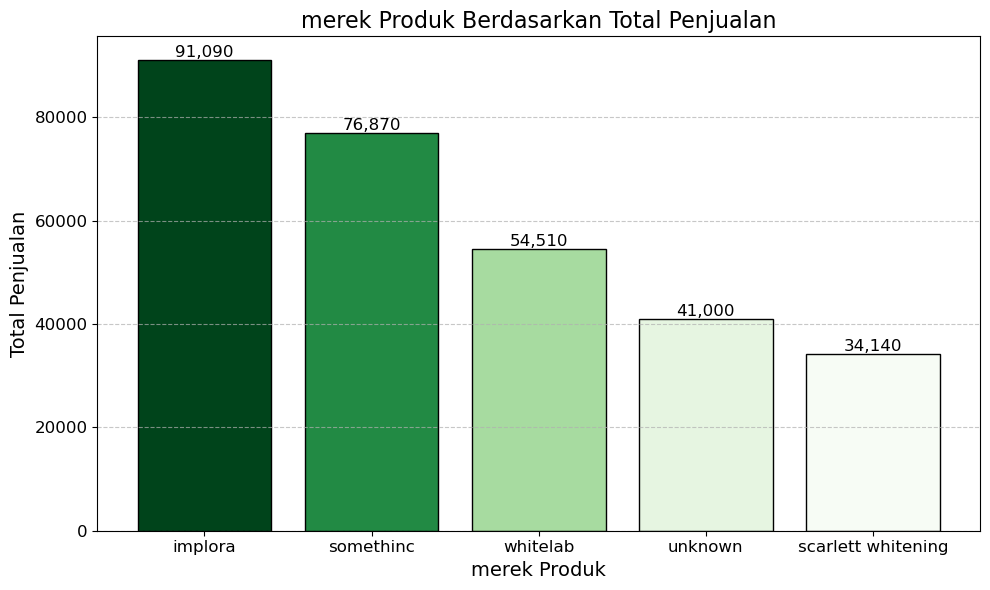

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Menghitung total produk terjual berdasarkan merek
merek_penjualan = df.groupby('merek')['produkterjual'].sum().reset_index()

# Mengurutkan berdasarkan produk terjual dari yang terbesar
merek_penjualan = merek_penjualan.sort_values(by='produkterjual', ascending=False)

# Mendapatkan Top 5 merek dengan total penjualan terbanyak
top_5_merek = merek_penjualan.head(5)

# Normalisasi untuk mendapatkan skala warna
norm = plt.Normalize(top_5_merek['produkterjual'].min(), top_5_merek['produkterjual'].max())
colors = plt.cm.Greens(norm(top_5_merek['produkterjual']))  # Menggunakan palet hijau

# Membuat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_merek['merek'], top_5_merek['produkterjual'], color=colors, edgecolor='black')

# Menambahkan judul dan label
plt.xlabel('merek Produk', fontsize=14)
plt.ylabel('Total Penjualan', fontsize=14)
plt.title('merek Produk Berdasarkan Total Penjualan', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan anotasi nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', ha='center', va='bottom', fontsize=12, color='black')

# Menampilkan plot
plt.tight_layout()
plt.show()

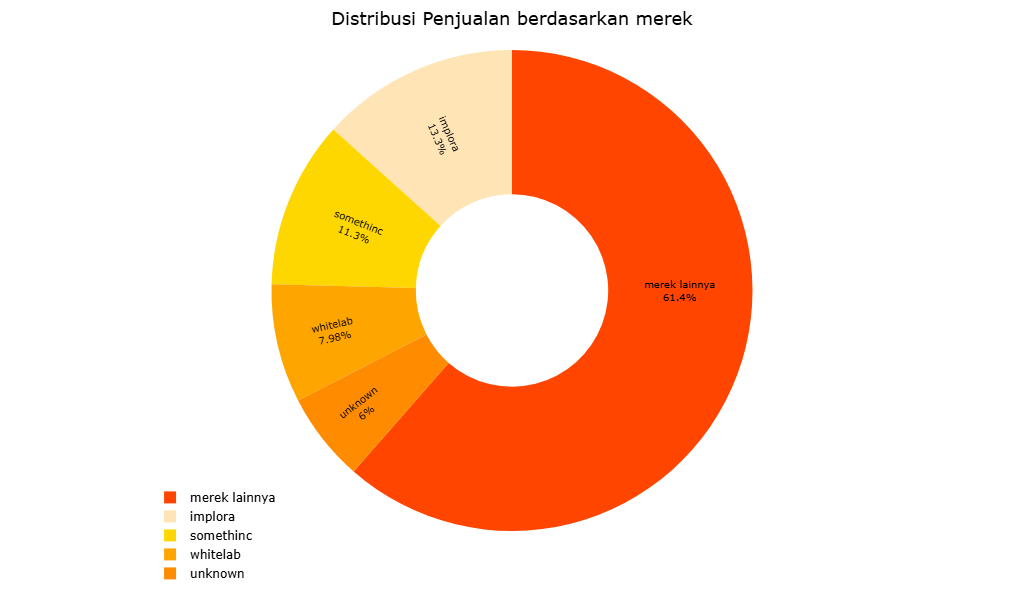

In [110]:
import pandas as pd
import plotly.graph_objects as go

# Menghitung total penjualan per merek
type_sales = df.groupby('merek')['produkterjual'].sum().sort_values(ascending=False)
threshold_percentage = 5

# Hitung persentase penjualan per merek
total_sales = type_sales.sum()
type_sales_percentage = (type_sales / total_sales) * 100

# Menentukan kategori dengan persentase di bawah threshold
small_types = type_sales_percentage[type_sales_percentage < threshold_percentage].index

# Menggabungkan kategori kecil menjadi 'Others'
type_sales['merek lainnya'] = type_sales[small_types].sum()
type_sales = type_sales[~type_sales.index.isin(small_types)]

# Hitung persentase baru setelah penggabungan
type_sales_percentage = (type_sales / total_sales) * 100

# Definisikan palet warna dari terang ke gelap
colors = ['#FFE4B5', '#FFD700', '#FFA500', '#FF8C00', '#FF4500']  # Dari terang ke gelap
num_types = len(type_sales)

# Membuat pie chart dengan Plotly
fig = go.Figure()

# Menambahkan trace untuk pie chart
fig.add_trace(go.Pie(
    labels=type_sales.index,  # Menggunakan label merek
    values=type_sales.values,  # Menggunakan jumlah produk terjual
    hole=0.4,  # Membuat Donut Chart
    textinfo='label+percent',  # Menampilkan label dan persentase
    insidetextorientation='radial',  # Orientasi teks di dalam pie chart
    marker=dict(colors=colors[:num_types]),  # Warna dari terang ke gelap
    textfont=dict(size=10, color='black'),  # Ukuran dan warna teks di dalam pie chart
    hovertemplate='<b>%{label}</b><br>Persentase: %{percent:.2%}<br>Jumlah: %{value:.0f} produk<extra></extra>'  # Menampilkan jumlah produk terjual
))

fig.update_layout(
    title={
        'text': 'Distribusi Penjualan berdasarkan merek',
        'font_size': 18,
        'font_color': 'black',
        'x': 0.5,
        'xanchor': 'center'
    },
    template='plotly_white',  # Tema terang
    plot_bgcolor='white',  # Latar belakang plot putih
    paper_bgcolor='white',  # Latar belakang kertas putih
    legend=dict(
        font=dict(color='black'),  # Warna teks legend hitam
        orientation='v',  # Orientasi vertikal
        yanchor='top',
        y=0.1,  # Menempatkan legend di samping pie chart
        xanchor='left',
        x=0.0001  # Menempatkan legend sedikit lebih jauh di sebelah kanan pie chart
    ),
    margin=dict(l=150, r=150, t=50, b=15),  # Mengatur margin
    height=600,  # Tinggi plot
    width=900  # Lebar plot
)

# Menampilkan plot
fig.show()

In [111]:
import pandas as pd

# Misalkan df adalah DataFrame yang sudah ada
df_whitelab = df[df['merek'].str.lower() == 'whitelab']
df_whitelab

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi
6,upgraded formula whitelab n10dose brightening ...,75000,50000,Jakarta Utara,45,Whitelab Official Store,20 ml,whitelab,DKI Jakarta
38,whitelab hydrating serum serum kulit lembap ha...,69000,1000,Jakarta Utara,18,Whitelab Official Store,20 ml,whitelab,DKI Jakarta
104,whitelab intense brightening serum niacinamide 10,66700,100,Jakarta Utara,0,POG,20 ml,whitelab,DKI Jakarta
222,whitelab n5dose n10dose brightening serum menc...,74000,100,Surabaya,0,DuniaKecantikan,20 ml,whitelab,Jawa Timur
556,whitelab n10dose brightening serum pencerah wajah,64800,100,Surabaya,23,Whitelab Store Surabaya,20 ml,whitelab,Jawa Timur
582,whitelab intense brightening booster serum nia...,68400,250,Jakarta Barat,0,Veisya Online Shop,20 ml,whitelab,DKI Jakarta
1191,whitelab brightening face serum,34000,750,Jakarta Utara,0,ckstoree,20 ml,whitelab,DKI Jakarta
1253,whitelab 20ml brightening booster serum niacin...,67900,250,Tangerang,0,Eriolla Official Store,20 ml,whitelab,Banten
1725,whitelab brightening face serum 20ml,75900,250,Jakarta Barat,10,Chen i-deal,20 ml,whitelab,DKI Jakarta
2129,whitelab brightening face serum 20 ml,89600,80,Jakarta Selatan,0,Tokopedia NOW!,20 ml,whitelab,DKI Jakarta


In [112]:
import pandas as pd

df.loc[(df['merek'].str.lower() == 'whitelab') & (df['ukuran'].isnull() | (df['ukuran'] == None)), 'ukuran'] = '20 ml'
df_whitelab.head(2)

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi
6,upgraded formula whitelab n10dose brightening ...,75000,50000,Jakarta Utara,45,Whitelab Official Store,20 ml,whitelab,DKI Jakarta
38,whitelab hydrating serum serum kulit lembap ha...,69000,1000,Jakarta Utara,18,Whitelab Official Store,20 ml,whitelab,DKI Jakarta


In [113]:
import pandas as pd

# Misalkan df adalah DataFrame yang sudah ada
df_implora = df[df['merek'].str.lower() == 'implora']
df_implora

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi
27,implora serum wajah,30000,10000,Jakarta Selatan,14,Implora Official Store,20 ml,implora,DKI Jakarta
33,implora face serum luminous serum midnight ser...,18000,2000,Kab. Kediri,0,Ratu Cosmetic8,20 ml,implora,Jawa Timur
35,vip implora face serum serum wajah acne bright...,19100,2000,Surabaya,24,VICCI Beauty House,20 ml,implora,Jawa Timur
51,implora serum wajah acne luminous brightening ...,19500,2000,Jakarta Barat,0,Debelleza Shop,20 ml,implora,DKI Jakarta
56,implora face serum 20 ml luminous brightening ...,6800,10000,Surabaya,9,Fleurie Store,5 ml,implora,Jawa Timur
59,implora serum wajah face serum peeling acne mi...,9999,2000,Surabaya,0,LACI KOSMETIK,5 ml,implora,Jawa Timur
61,implora serum wajah acne luminous brightening ...,20000,250,Jakarta Selatan,22,hangvalen,20 ml,implora,DKI Jakarta
70,implora serum wajah 20ml implora face serum lu...,18400,100,Bogor,0,COSME MURAH,20 ml,implora,Jawa Barat
103,implora serum 20ml perawatan wajah,18000,1000,Bekasi,11,Inimelmel Online Shop,20 ml,implora,Jawa Barat
116,implora face serum 20ml acne brightening peeli...,23699,1000,Jakarta Barat,39,Pesona Ayu,20 ml,implora,DKI Jakarta


In [114]:
# Mengubah ukuran menjadi '5 ml' untuk produk Implora yang harganya di bawah 12000
df.loc[(df['merek'].str.lower() == 'implora') & (df['harga'] < 12000), 'ukuran'] = '5 ml'
# Mengubah ukuran menjadi '20 ml' untuk produk Implora yang harganya di atas 15000
df.loc[(df['merek'].str.lower() == 'implora') & (df['harga'] > 15000), 'ukuran'] = '20 ml'
df[df['merek'].str.lower() == 'implora']
df_implora

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi
27,implora serum wajah,30000,10000,Jakarta Selatan,14,Implora Official Store,20 ml,implora,DKI Jakarta
33,implora face serum luminous serum midnight ser...,18000,2000,Kab. Kediri,0,Ratu Cosmetic8,20 ml,implora,Jawa Timur
35,vip implora face serum serum wajah acne bright...,19100,2000,Surabaya,24,VICCI Beauty House,20 ml,implora,Jawa Timur
51,implora serum wajah acne luminous brightening ...,19500,2000,Jakarta Barat,0,Debelleza Shop,20 ml,implora,DKI Jakarta
56,implora face serum 20 ml luminous brightening ...,6800,10000,Surabaya,9,Fleurie Store,5 ml,implora,Jawa Timur
59,implora serum wajah face serum peeling acne mi...,9999,2000,Surabaya,0,LACI KOSMETIK,5 ml,implora,Jawa Timur
61,implora serum wajah acne luminous brightening ...,20000,250,Jakarta Selatan,22,hangvalen,20 ml,implora,DKI Jakarta
70,implora serum wajah 20ml implora face serum lu...,18400,100,Bogor,0,COSME MURAH,20 ml,implora,Jawa Barat
103,implora serum 20ml perawatan wajah,18000,1000,Bekasi,11,Inimelmel Online Shop,20 ml,implora,Jawa Barat
116,implora face serum 20ml acne brightening peeli...,23699,1000,Jakarta Barat,39,Pesona Ayu,20 ml,implora,DKI Jakarta


In [115]:
from scipy.stats import zscore
# Menghitung nilai rata-rata dan standar deviasi
mean_harga = df["harga"].mean()
std_harga = df["harga"].std()
# Menentukan batas atas dan batas bawah untuk outlier
upper_limit = mean_harga + 2 * std_harga
lower_limit = mean_harga - 2 * std_harga
# Menentukan outlier
outlier = df[(df["harga"] > upper_limit) | (df["harga"] < lower_limit)]
outlier

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi
195,ojesh serum wajah hyluronic acid perawatan waj...,1950000,100,Jakarta Barat,0,efenel_baby,None,unknown,DKI Jakarta
243,doctor babor 10d hyaluronic acid ampoule serum...,1230000,100,Jakarta Utara,0,BABOR INDONESIA,None,unknown,DKI Jakarta
451,skiisk2skii lxp ulitmate perfecting serum seru...,2850000,100,Jakarta Utara,0,SK-II LOVERS SHOP,10 ml,skii,DKI Jakarta
483,vichy liftactiv pure vitamin brightening corre...,699000,90,Jakarta Utara,0,Winnie's Stores,None,unknown,DKI Jakarta
566,la roche posay mela b3 niacinamide serum 30ml ...,756600,1000,Tangerang,3,La Roche Posay,30 ml,la roche posay,Banten
893,neostrata bionic face serum pencerahantiaging ...,630500,100,Jakarta Selatan,3,BPOM-Skincare,30 ml,unknown,DKI Jakarta
960,hyaluronic acid hyaron skin booster hyaluronic...,820000,100,Jakarta Selatan,0,Gangnamstore7,None,unknown,DKI Jakarta
1015,perawatan wajah skincare essence serum rossceu...,950000,2000,Jakarta Barat,0,efenel_baby,None,unknown,DKI Jakarta
1451,obagi professional serum 10 30 ml vitamin wajah,1388000,90,Jakarta Timur,0,Rich Rabbit,30 ml,unknown,DKI Jakarta
1556,neostrata bionic face serum 30ml serum,600000,90,Bogor,0,female things,30 ml,unknown,Jawa Barat


In [116]:
# Menampilkan hanya data untuk merek Skintific
df_skintific = df[df['merek'].str.lower() == 'skintific']
df_skintific

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi
5,skintific 12 aha bha pha lha peeling 30ml seru...,128001,8000,Jakarta Timur,57,Skintific Official Store,30 ml,skintific,DKI Jakarta
89,skintific 10 niacinamide brightening serum 20m...,119001,10000,Jakarta Timur,30,Skintific Official Store,20 ml,skintific,DKI Jakarta
106,skintific 10 niacinamide brightening serum 20 ...,119900,100,Depok,29,Vamos Indonesia,20 ml,skintific,Jawa Barat
126,skintific 10 niacinamide brigtening serum 20 m...,127000,100,Jakarta Pusat,0,CENTURY HEALTHCARE,20 ml,skintific,DKI Jakarta
242,skintific sym white 377 dark spot 20ml perawat...,136000,80,Jakarta Barat,0,CENTURY HEALTHCARE,20 ml,skintific,DKI Jakarta
311,skintific 10 niacinamide brightening serum 50ml,269000,100,Kab. Bekasi,10,Guardian Official Store,50 ml,skintific,Jawa Barat
361,launch skintific 12 acid peeling serum 30ml ek...,120500,100,Kab. Tangerang,0,YuraSkinOfficial,30 ml,skintific,Banten
415,skintific symwhite 377 dark spot serum brighte...,239001,8000,Jakarta Timur,33,Skintific Official Store,50 ml,skintific,DKI Jakarta
418,skintific 2 salicylic acid anti acne serum 20 ...,127000,100,Jakarta Barat,0,CENTURY HEALTHCARE,20 ml,skintific,DKI Jakarta
700,skintific 10 niacinamide brightening serum 50 ml,239200,100,Kab. Tangerang,20,Watsons Indonesia,50 ml,skintific,Banten


In [117]:
# Menampilkan hanya data untuk merek Somethinc
df_somethinc = df[df['merek'].str.lower() == 'somethinc']
df_somethinc

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi
31,somethinc niacinamide moisture sabi beet serum...,87400,750,Jakarta Utara,5,Nihonmart Official Store,20 ml,somethinc,DKI Jakarta
48,somethinc 5 niacinamide moisture sabi beet serum,92000,10000,Tangerang,20,SOMETHINC Official,20 ml,somethinc,Banten
63,somethinc 10 niacinamide moisture sabi beet br...,125000,10000,Tangerang,17,SOMETHINC Official,20 ml,somethinc,Banten
76,somethinc 5 10 niacinamide moisture sabi beet ...,81880,100,Surabaya,8,Saening Store,20 ml,somethinc,Jawa Timur
77,somethinc 2 paket seller layering serum niacin...,170720,4000,Tangerang,29,SOMETHINC Official,None,somethinc,Banten
...,...,...,...,...,...,...,...,...,...
4085,somethinc niacinamide 10 barrier serum 20ml40ml,102000,100,Jakarta Timur,0,Goodskin88,20 ml,somethinc,DKI Jakarta
4301,somethinc 20ml level 1 retinol serum wajah 20 ...,135700,1000,Tangerang,0,Eriolla Official Store,20 ml,somethinc,Banten
4896,somethinc 20ml resurrect multibiome face serum...,84500,750,Tangerang,0,Eriolla Official Store,20 ml,somethinc,Banten
5084,somethinc niacinamide beet moisture serum 20ml...,82100,70,Medan,0,Made By Caramel,20 ml,somethinc,unknown


In [118]:
import pandas as pd

def set_size(row):
    # Memeriksa apakah merek adalah 'Somethinc'
    if row['merek'].lower() == 'somethinc':  # Perbaikan di sini
        if 'paket' in row['namaproduk'].lower():
            return None  # Jika ada kata 'paket', ukuran menjadi 'none'
        elif row['harga'] < 130000:
            return '20 ml'  # Harga di bawah 130000 menjadi 20 ml
        elif row['harga'] > 150000:
            return '40 ml'  # Harga di atas 150000 menjadi 40 ml
    return row['ukuran']  # Jika tidak memenuhi kriteria, kembalikan ukuran lama

# Terapkan fungsi ke kolom 'ukuran'
df['ukuran'] = df.apply(set_size, axis=1)

# Filter DataFrame untuk merek Somethinc
df_somethinc = df[df['merek'].str.lower() == 'somethinc']
df_somethinc

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi
31,somethinc niacinamide moisture sabi beet serum...,87400,750,Jakarta Utara,5,Nihonmart Official Store,20 ml,somethinc,DKI Jakarta
48,somethinc 5 niacinamide moisture sabi beet serum,92000,10000,Tangerang,20,SOMETHINC Official,20 ml,somethinc,Banten
63,somethinc 10 niacinamide moisture sabi beet br...,125000,10000,Tangerang,17,SOMETHINC Official,20 ml,somethinc,Banten
76,somethinc 5 10 niacinamide moisture sabi beet ...,81880,100,Surabaya,8,Saening Store,20 ml,somethinc,Jawa Timur
77,somethinc 2 paket seller layering serum niacin...,170720,4000,Tangerang,29,SOMETHINC Official,None,somethinc,Banten
...,...,...,...,...,...,...,...,...,...
4085,somethinc niacinamide 10 barrier serum 20ml40ml,102000,100,Jakarta Timur,0,Goodskin88,20 ml,somethinc,DKI Jakarta
4301,somethinc 20ml level 1 retinol serum wajah 20 ...,135700,1000,Tangerang,0,Eriolla Official Store,20 ml,somethinc,Banten
4896,somethinc 20ml resurrect multibiome face serum...,84500,750,Tangerang,0,Eriolla Official Store,20 ml,somethinc,Banten
5084,somethinc niacinamide beet moisture serum 20ml...,82100,70,Medan,0,Made By Caramel,20 ml,somethinc,unknown


In [119]:
# Fungsi untuk mengubah ukuran di atas 200 ml menjadi None
def update_size(size):
    # Memastikan bahwa ukuran tidak None atau NaN
    if pd.isna(size) or size is None:
        return None

    # Menghapus spasi dan mengecek jika ukuran adalah string
    size = str(size).strip()

    # Mencari dan mengubah ukuran ke float
    if 'ml' in size:
        ml_value = float(size.replace(' ml', '').strip())
        return None if ml_value > 200 else size  # Mengubah ukuran di atas 200 ml menjadi None
    return size

# Terapkan fungsi ke kolom 'ukuran'
df['ukuran'] = df['ukuran'].apply(update_size)
df.head(3)

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi
0,flash elsheskin radiant skin serum 15ml niacin...,109000,100,Tangerang,16,ElsheSkin,15 ml,elsheskin,Banten
1,bromen facial wash brightening serum pemutih w...,39000,250,Jakarta Pusat,0,Bromen Official Store,None,bromen,DKI Jakarta
2,the originote acne b5 serum 20ml serum wajah b...,37000,5000,Jakarta Timur,42,The Originote Official Shop,20 ml,the originote,DKI Jakarta


In [120]:
# Mengonversi string 'None' menjadi None (missing value)
df['ukuran'] = df['ukuran'].replace('None', None)
df

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi
0,flash elsheskin radiant skin serum 15ml niacin...,109000,100,Tangerang,16,ElsheSkin,15 ml,elsheskin,Banten
1,bromen facial wash brightening serum pemutih w...,39000,250,Jakarta Pusat,0,Bromen Official Store,None,bromen,DKI Jakarta
2,the originote acne b5 serum 20ml serum wajah b...,37000,5000,Jakarta Timur,42,The Originote Official Shop,20 ml,the originote,DKI Jakarta
5,skintific 12 aha bha pha lha peeling 30ml seru...,128001,8000,Jakarta Timur,57,Skintific Official Store,30 ml,skintific,DKI Jakarta
6,upgraded formula whitelab n10dose brightening ...,75000,50000,Jakarta Utara,45,Whitelab Official Store,20 ml,whitelab,DKI Jakarta
...,...,...,...,...,...,...,...,...,...
7295,the ordinary hyaluronic acid 2b5 serum wajah,58000,60,Jakarta Utara,0,tk_untung,None,the ordinary,DKI Jakarta
7317,neolife serum wajah anti aging neolife serum a...,120000,90,Jakarta Barat,0,DUTA HERBAL88,None,unknown,DKI Jakarta
7319,yoshita whitening serum collagen pemutih wajah,80000,1000,Jakarta Pusat,0,Herbal.manjur01,None,yoshita,DKI Jakarta
7361,aish skincare darkpsot serum wajah mengatasi n...,99000,500,Bandung,0,QUEENZA BEAUTY 88,None,unknown,Jawa Barat


In [121]:
from scipy.stats import zscore
# Menghitung nilai rata-rata dan standar deviasi
mean_harga = df["harga"].mean()
std_harga = df["harga"].std()
# Menentukan batas atas dan batas bawah untuk outlier
upper_limit = mean_harga + 2 * std_harga
lower_limit = mean_harga - 2 * std_harga
# Menentukan outlier
outlier = df[(df["harga"] > upper_limit) | (df["harga"] < lower_limit)]
outlier

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi
195,ojesh serum wajah hyluronic acid perawatan waj...,1950000,100,Jakarta Barat,0,efenel_baby,None,unknown,DKI Jakarta
243,doctor babor 10d hyaluronic acid ampoule serum...,1230000,100,Jakarta Utara,0,BABOR INDONESIA,None,unknown,DKI Jakarta
451,skiisk2skii lxp ulitmate perfecting serum seru...,2850000,100,Jakarta Utara,0,SK-II LOVERS SHOP,10 ml,skii,DKI Jakarta
483,vichy liftactiv pure vitamin brightening corre...,699000,90,Jakarta Utara,0,Winnie's Stores,None,unknown,DKI Jakarta
566,la roche posay mela b3 niacinamide serum 30ml ...,756600,1000,Tangerang,3,La Roche Posay,30 ml,la roche posay,Banten
893,neostrata bionic face serum pencerahantiaging ...,630500,100,Jakarta Selatan,3,BPOM-Skincare,30 ml,unknown,DKI Jakarta
960,hyaluronic acid hyaron skin booster hyaluronic...,820000,100,Jakarta Selatan,0,Gangnamstore7,None,unknown,DKI Jakarta
1015,perawatan wajah skincare essence serum rossceu...,950000,2000,Jakarta Barat,0,efenel_baby,None,unknown,DKI Jakarta
1451,obagi professional serum 10 30 ml vitamin wajah,1388000,90,Jakarta Timur,0,Rich Rabbit,30 ml,unknown,DKI Jakarta
1556,neostrata bionic face serum 30ml serum,600000,90,Bogor,0,female things,30 ml,unknown,Jawa Barat


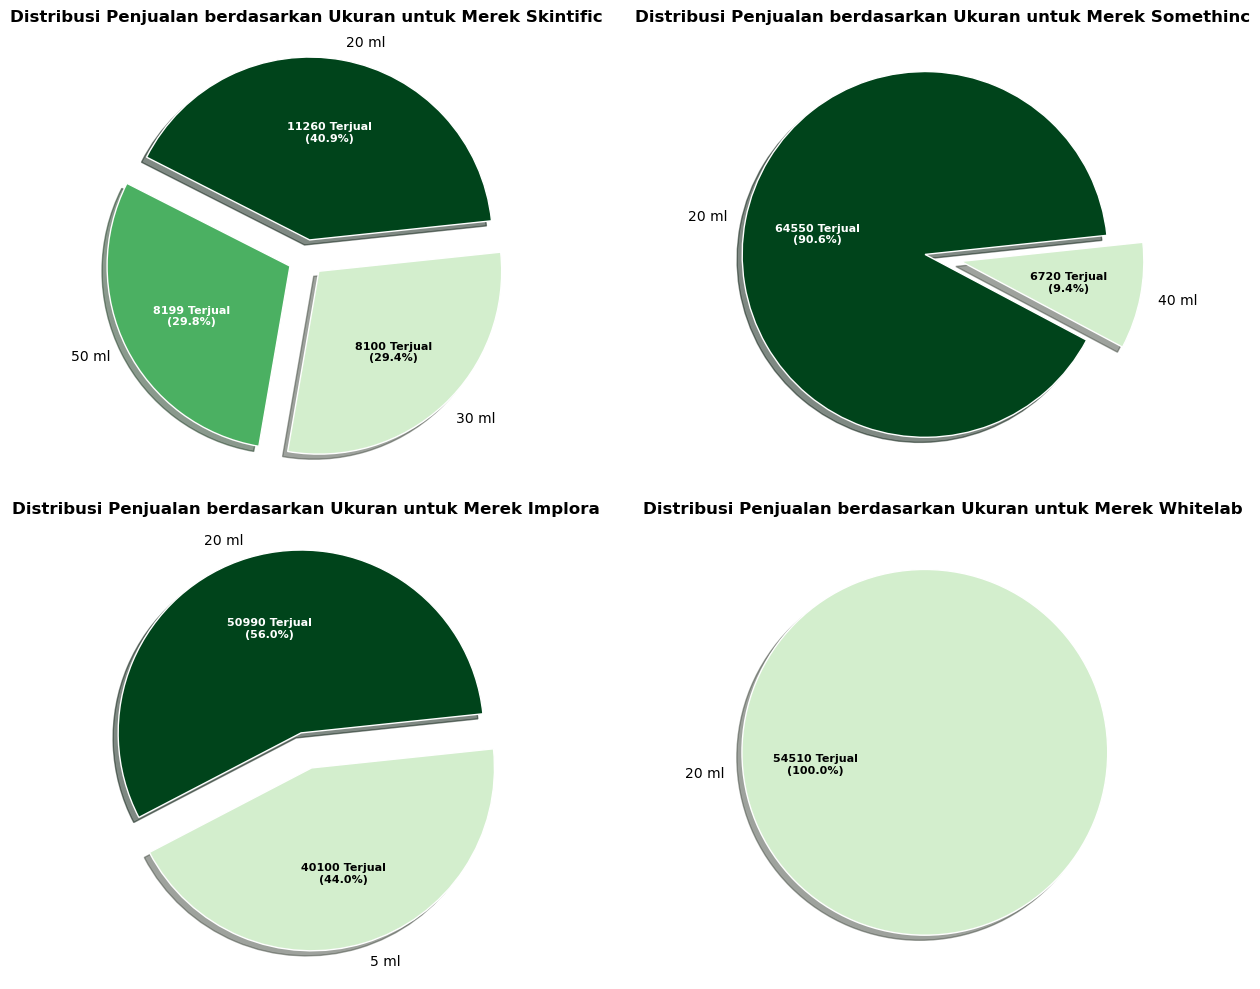

In [122]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi untuk mencari ukuran terlaris per merek
def get_best_selling_size(merek):
    # Memfilter DataFrame untuk merek yang diinginkan
    df_filtered = df[df['merek'].str.lower() == merek.lower()]
    
    # Menghitung total penjualan per ukuran
    size_sales = df_filtered.groupby('ukuran')['produkterjual'].sum().sort_values(ascending=False)
    
    # Mendapatkan ukuran terlaris
    if not size_sales.empty:
        best_size = size_sales.idxmax()
        best_sales = size_sales.max()
        return best_size, best_sales
    return None, 0

# Fungsi untuk membuat pie chart berdasarkan ukuran produk untuk setiap merek
def plot_pie_chart(merek, ax):
    # Memfilter DataFrame untuk merek yang diinginkan
    df_filtered = df[df['merek'].str.lower() == merek.lower()]

    # Menghitung total penjualan per ukuran
    sales_per_size = df_filtered.groupby('ukuran')['produkterjual'].sum().sort_values(ascending=False)
    
    # Menambahkan ukuran None jika ada penjualan
    if None in sales_per_size.index:
        sales_per_size = sales_per_size.append(pd.Series(0, index=[None]))
    
    # Jika tidak ada ukuran yang memenuhi syarat, tidak menampilkan chart
    if sales_per_size.empty:
        print(f'Tidak ada penjualan untuk merek {merek}.')
        return

    # Normalisasi warna hijau (hijau tua ke hijau muda)
    colors = plt.cm.Greens(np.linspace(0.2, 1, len(sales_per_size)))[::-1]  # Balik urutan

    # Membuat pie chart
    wedges, texts, autotexts = ax.pie(
        sales_per_size,
        labels=sales_per_size.index.fillna('Ukuran Tidak Diketahui'),  # Menggantikan None dengan label
        autopct=lambda p: f'{int(p * sales_per_size.sum() / 100)} Terjual\n({p:.1f}%)',
        startangle=6,
        explode=[0.1] * len(sales_per_size),  # Memisahkan setiap irisan
        shadow=True,  # Menambahkan bayangan untuk efek 3D
        colors=colors,  # Menambahkan skema warna yang telah didefinisikan
        wedgeprops={'edgecolor': 'white'}  # Garis pemisah antar irisan
    )

    # Menambahkan title untuk pie chart
    ax.set_title(f'Distribusi Penjualan berdasarkan Ukuran untuk Merek {merek.capitalize()}', fontsize=12, weight='bold')

    # Mengatur gaya teks pada pie chart
    for i, autotext in enumerate(autotexts):
        autotext.set_fontsize(8)  # Mengubah ukuran font agar lebih terbaca
        autotext.set_fontweight('bold')
        # Mengubah warna teks berdasarkan warna irisan
        if wedges[i].get_facecolor()[0] < 0.5:  # Jika warna gelap
            autotext.set_color('white')
        else:  # Jika warna terang
            autotext.set_color('black')

# Membuat subplot untuk menampung pie chart
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid

# Memanggil fungsi untuk setiap merek dengan subplot
brands = ['skintific', 'somethinc', 'implora', 'whitelab']
for ax, merek in zip(axs.flat, brands):
    plot_pie_chart(merek, ax)
    best_size, best_sales = get_best_selling_size(merek)
    
# Menampilkan plot
plt.tight_layout()  # Mengatur layout agar tidak saling tumpang tindih
plt.show()


In [123]:
# Mengelompokkan data berdasarkan ukuran dan merek, menghitung total produk terjual dan rata-rata harga
grouped_data = df.groupby(['ukuran', 'merek']).agg(
    total_terjual=('produkterjual', 'sum'),
    rata_rata_harga=('harga', 'mean')
).reset_index()

# Mengambil 3 ukuran terlaris berdasarkan total produk terjual
top_ukuran = grouped_data.nlargest(4, 'total_terjual')
# Menampilkan merek terlaris, ukuran, dan rata-rata harganya
print("Merek Terlaris dengan Ukuran dan Rata-Rata Harganya:")
top_ukuran

Merek Terlaris dengan Ukuran dan Rata-Rata Harganya:


,ukuran,merek,total_terjual,rata_rata_harga
46,20 ml,somethinc,64550,98951.483333
53,20 ml,whitelab,54510,82771.470588
32,20 ml,implora,50990,24728.729167
90,5 ml,implora,40100,7582.714286


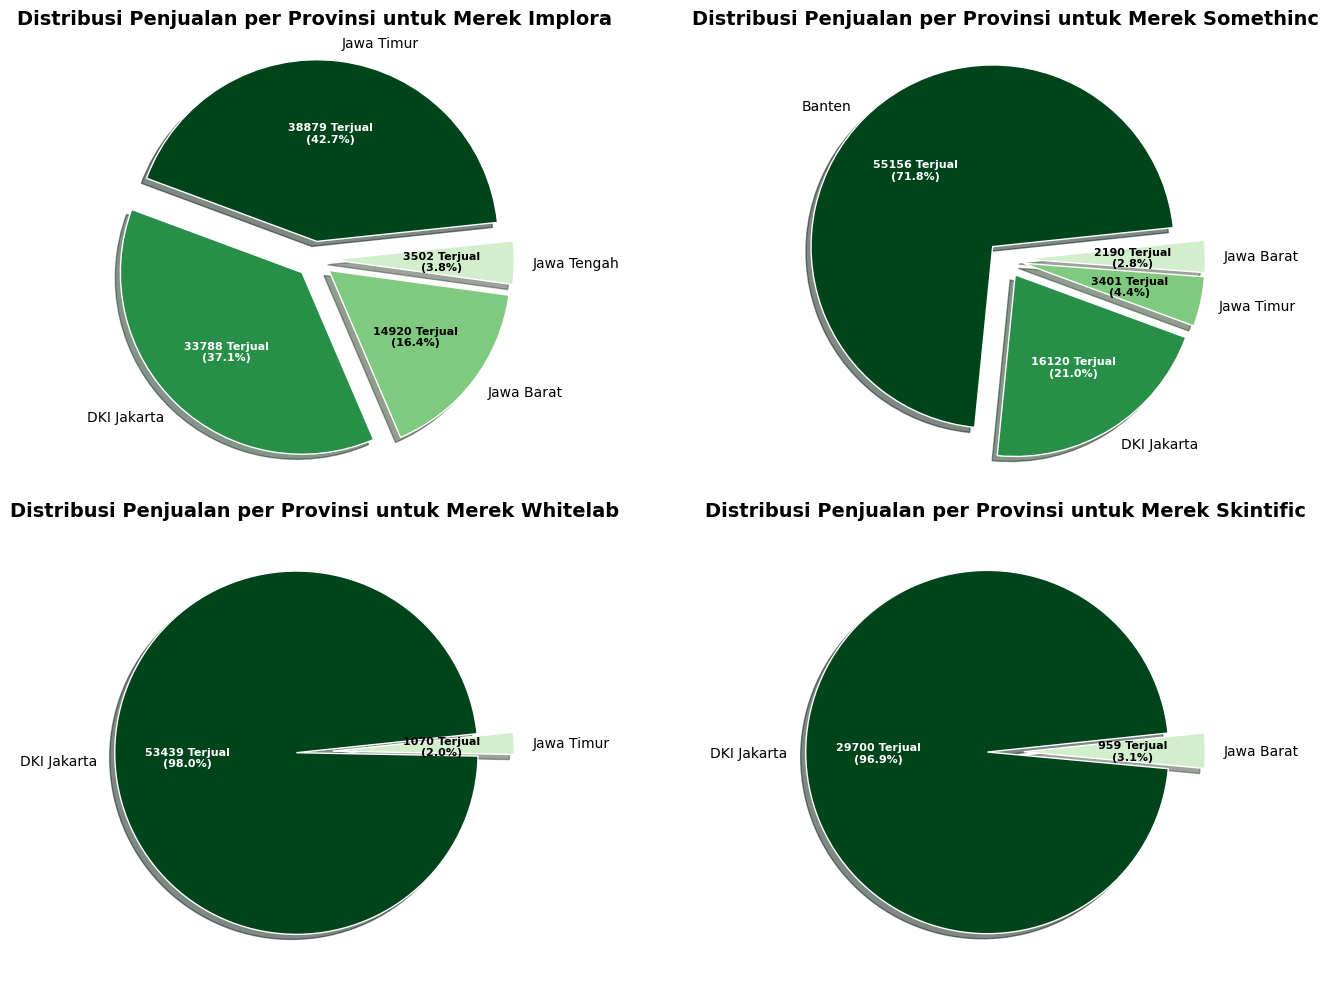

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk membuat pie chart untuk setiap merek
def plot_pie_chart(merek, ax):
    # Menghitung total penjualan per provinsi untuk merek yang diinginkan
    df_filtered = df[df['merek'].str.lower() == merek.lower()]

    # Menghitung total penjualan per provinsi
    sales_per_provinsi = df_filtered.groupby('provinsi')['produkterjual'].sum().sort_values(ascending=False)

    # Menghitung total penjualan untuk mendapatkan persentase
    total_sales = sales_per_provinsi.sum()
    sales_percentage = (sales_per_provinsi / total_sales) * 100

    # Memfilter provinsi dengan kontribusi lebih dari 1.8%
    sales_percentage_filtered = sales_percentage[sales_percentage > 1.8]

    # Jika tidak ada provinsi yang memenuhi syarat, tidak menampilkan chart
    if sales_percentage_filtered.empty:
        print(f'Tidak ada provinsi dengan kontribusi di atas 1.8% untuk merek {merek}.')
        return

    # Normalisasi warna hijau (hijau tua ke hijau muda)
    colors = plt.cm.Greens(np.linspace(0.2, 1, len(sales_percentage_filtered)))[::-1]  # Balik urutan

    # Membuat pie chart
    wedges, texts, autotexts = ax.pie(
        sales_percentage_filtered,
        labels=sales_percentage_filtered.index,
        autopct=lambda p: f'{int(p * total_sales / 100)} Terjual\n({p:.1f}%)',
        startangle=6,
        explode=[0.1] * len(sales_percentage_filtered),  # Memisahkan setiap irisan
        shadow=True,  # Menambahkan bayangan untuk efek 3D
        colors=colors,  # Menambahkan skema warna yang telah didefinisikan
        wedgeprops={'edgecolor': 'white'}  # Garis pemisah antar irisan
    )

    # Menambahkan title untuk pie chart
    ax.set_title(f'Distribusi Penjualan per Provinsi untuk Merek {merek.capitalize()}', fontsize=14, weight='bold')

    # Mengatur gaya teks pada pie chart
    for i, autotext in enumerate(autotexts):
        autotext.set_fontsize(8)  # Mengubah ukuran font agar lebih terbaca
        autotext.set_fontweight('bold')
        # Mengubah warna teks berdasarkan warna irisan
        if wedges[i].get_facecolor()[0] < 0.5:  # Jika warna gelap
            autotext.set_color('white')
        else:  # Jika warna terang
            autotext.set_color('black')

# Membuat subplot untuk menampung pie chart
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid

# Memanggil fungsi untuk setiap merek dengan subplot
brands = ['implora', 'somethinc', 'whitelab', 'skintific']
for ax, merek in zip(axs.flat, brands):
    plot_pie_chart(merek, ax)

# Menampilkan plot
plt.tight_layout()  # Mengatur layout agar tidak saling tumpang tindih
plt.show()

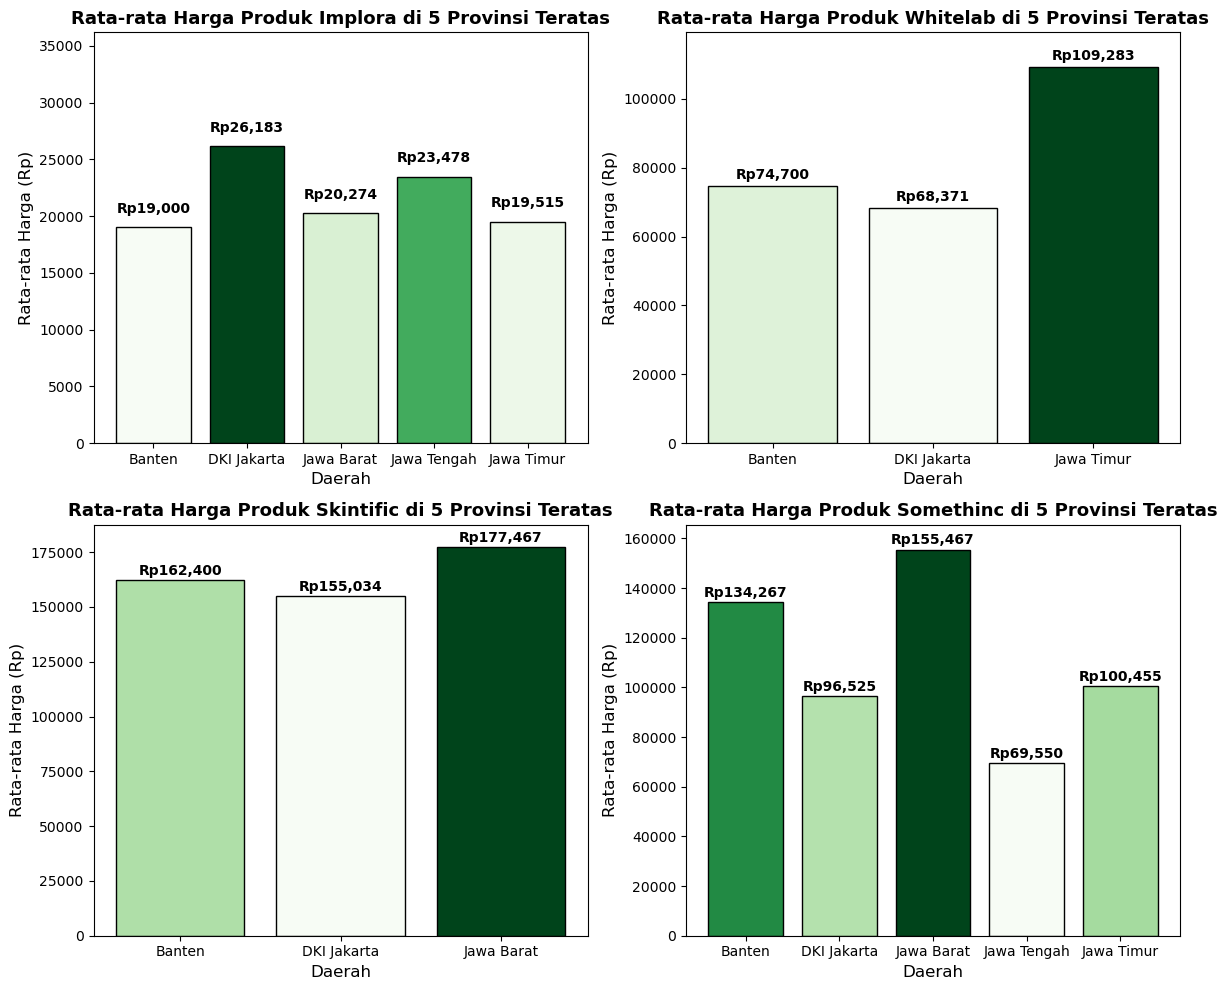

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung total produk terjual per daerah
total_terjual_per_daerah = df.groupby('provinsi')['produkterjual'].sum().reset_index()

# Memilih 5 daerah teratas berdasarkan produk terjual terbanyak
top_5_daerah = total_terjual_per_daerah.nlargest(5, 'produkterjual')

# Fungsi untuk menghitung rata-rata harga untuk merek tertentu
def hitung_rata_rata_harga(merek):
    # Filter data untuk merek di 5 daerah teratas
    df_top_5 = df[(df['merek'].str.lower() == merek.lower()) & (df['provinsi'].isin(top_5_daerah['provinsi']))]
    # Menghitung rata-rata harga untuk merek di 5 daerah teratas
    avg_harga = df_top_5.groupby('provinsi')['harga'].mean().reset_index()
    return avg_harga

# Menghitung rata-rata harga untuk masing-masing merek
avg_harga_implora = hitung_rata_rata_harga('Implora')
avg_harga_whitelab = hitung_rata_rata_harga('Whitelab')
avg_harga_skintific = hitung_rata_rata_harga('Skintific')
avg_harga_somethinc = hitung_rata_rata_harga('Somethinc')

# Membuat subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()  # Mengubah matriks menjadi array satu dimensi

# Daftar data dan judul untuk iterasi
data = [
    (avg_harga_implora, 'Implora'),
    (avg_harga_whitelab, 'Whitelab'),
    (avg_harga_skintific, 'Skintific'),
    (avg_harga_somethinc, 'Somethinc')
]

# Menggambar grafik
for i, (avg_harga, merek) in enumerate(data):
    norm = plt.Normalize(avg_harga['harga'].min(), avg_harga['harga'].max())
    colors = plt.cm.Greens(norm(avg_harga['harga']))
    barplot = axs[i].bar(avg_harga['provinsi'], avg_harga['harga'], color=colors, edgecolor='black')

    axs[i].set_title(f'Rata-rata Harga Produk {merek} di 5 Provinsi Teratas', fontsize=13, weight='bold')
    axs[i].set_xlabel('Daerah', fontsize=12)
    axs[i].set_ylabel('Rata-rata Harga (Rp)', fontsize=12)
    axs[i].set_ylim(0, avg_harga['harga'].max() + 10000)

    for bar in barplot:
        yval = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2, yval + 1000, f'Rp{yval:,.0f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

    axs[i].grid(False)

# Mengatur layout agar lebih rapi
plt.tight_layout()
plt.show()

## Visualisasi Distribusi Penjualan Berdasarkan Provinsi

#### Mengelompokkan data berdasarkan provinsi

In [125]:
provinsi_penjualan = df.groupby('provinsi')['produkterjual'].sum().reset_index()
# Mengurutkan berdasarkan total penjualan dari yang tertinggi ke terendah
provinsi_penjualan = provinsi_penjualan.sort_values(by='produkterjual', ascending=False)
provinsi_penjualan

,provinsi,produkterjual
3,DKI Jakarta,343650
1,Banten,176180
6,Jawa Timur,92890
4,Jawa Barat,58340
5,Jawa Tengah,6810
2,DIY Yogyakarta,2470
11,unknown,1430
10,Sumatera Selatan,550
0,Bali,540
9,Sulawesi Selatan,260


#### Distribusi 'produkterjual' berdasarkan 'provinsi':

Top 5 Provinsi Berdasarkan Total Penjualan:
      provinsi  produkterjual
3  DKI Jakarta         343650
1       Banten         176180
6   Jawa Timur          92890
4   Jawa Barat          58340
5  Jawa Tengah           6810


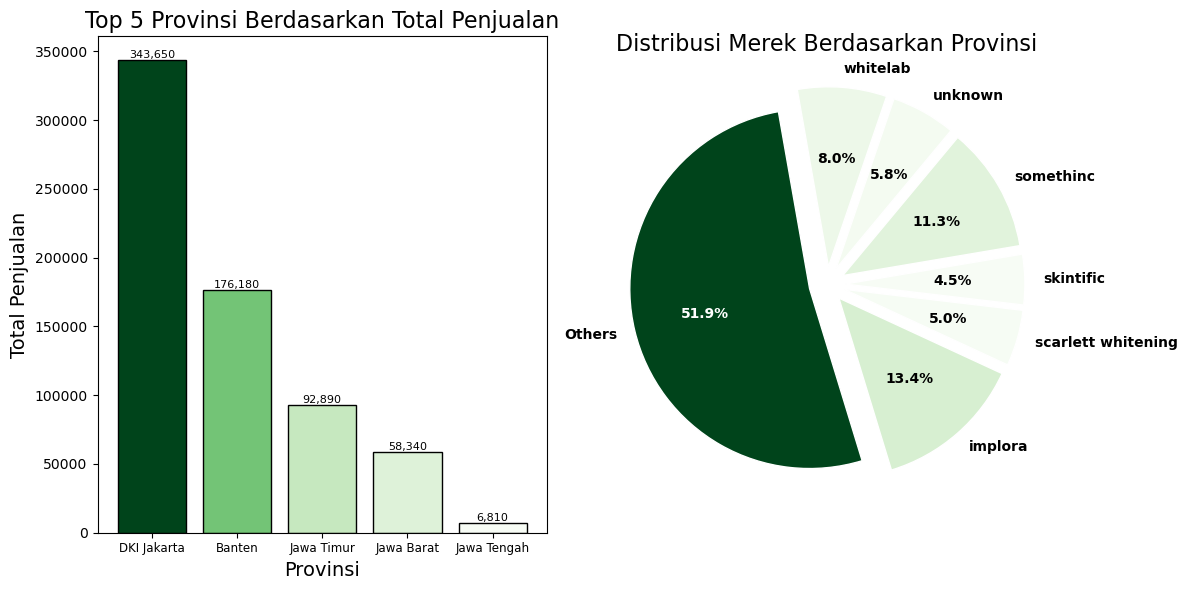

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Menghitung total penjualan per provinsi
provinsi_penjualan = df.groupby('provinsi')['produkterjual'].sum().reset_index()
provinsi_penjualan = provinsi_penjualan.sort_values(by='produkterjual', ascending=False)
top_5_provinsi = provinsi_penjualan.head(5)

# Menampilkan top 5 provinsi
print("Top 5 Provinsi Berdasarkan Total Penjualan:")
print(top_5_provinsi)

# Menghitung jumlah produk terjual berdasarkan merek untuk top 5 provinsi
merek_per_provinsi = df[df['provinsi'].isin(top_5_provinsi['provinsi'])].groupby(['provinsi', 'merek'])['produkterjual'].sum().reset_index()

# Visualisasi Bar Chart dan Pie Chart
plt.figure(figsize=(12, 6))  # Ukuran figure diperbesar untuk ruang tambahan

# Bar Chart untuk Top 5 Provinsi Berdasarkan Total Penjualan
plt.subplot(1, 2, 1)
norm = plt.Normalize(top_5_provinsi['produkterjual'].min(), top_5_provinsi['produkterjual'].max())
colors = plt.cm.Greens(norm(top_5_provinsi['produkterjual']))  # Menggunakan palet hijau
bars = plt.bar(top_5_provinsi['provinsi'], top_5_provinsi['produkterjual'], color=colors, edgecolor='black')

plt.xlabel('Provinsi', fontsize=14)
plt.ylabel('Total Penjualan', fontsize=14)
plt.title('Top 5 Provinsi Berdasarkan Total Penjualan', fontsize=16)
plt.xticks(fontsize=8.5)
plt.yticks(fontsize=10)
plt.grid(False)  # Menghapus grid

# Menambahkan anotasi nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', ha='center', va='bottom', fontsize=8, color='black')

# Pie Chart untuk distribusi merek berdasarkan provinsi
plt.subplot(1, 2, 2)

# Menghitung total penjualan berdasarkan merek
merek_counts = merek_per_provinsi.groupby('merek')['produkterjual'].sum().reset_index()

# Hitung persentase penjualan per merek
total_sales = merek_counts['produkterjual'].sum()
merek_counts['percentage'] = (merek_counts['produkterjual'] / total_sales) * 100

# Tentukan kategori dengan persentase di bawah threshold
threshold_percentage = 4
small_types = merek_counts[merek_counts['percentage'] < threshold_percentage]['merek']

# Gabungkan kategori kecil menjadi 'Others'
merek_counts.loc[merek_counts['merek'].isin(small_types), 'merek'] = 'Others'
merek_counts = merek_counts.groupby('merek').sum().reset_index()

# Normalisasi warna untuk pie chart
norm = plt.Normalize(merek_counts['produkterjual'].min(), merek_counts['produkterjual'].max())
colors = plt.cm.Greens(norm(merek_counts['produkterjual']))

# Pie Chart
explode = [0.1] * len(merek_counts)  # Mengatur eksplosi untuk menonjolkan bagian pie
wedges, texts, autotexts = plt.pie(merek_counts['produkterjual'], labels=merek_counts['merek'], 
                                    autopct='%1.1f%%', startangle=100, explode=explode, 
                                    wedgeprops={'edgecolor': 'w'}, colors=colors, 
                                    textprops={'fontweight': 'bold'})

plt.title('Distribusi Merek Berdasarkan Provinsi', fontsize=16)

# Menyesuaikan warna teks di dalam pie chart
for j, autotext in enumerate(autotexts):
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')
    # Mengubah warna teks berdasarkan warna irisan
    if colors[j][0] < 0.5:  # Jika warna gelap
        autotext.set_color('white')
    else:  # Jika warna terang
        autotext.set_color('black')

# Menyesuaikan jarak antara Bar Chart dan Pie Chart
plt.subplots_adjust(wspace=0.4)  # Mengatur ruang horizontal antara subplot

plt.tight_layout()
plt.show()

Top 5 Daerah Berdasarkan Total Penjualan:
             daerah  produkterjual
49        Tangerang         142830
13    Jakarta Utara         126120
47         Surabaya          82980
9     Jakarta Barat          78320
11  Jakarta Selatan          65590


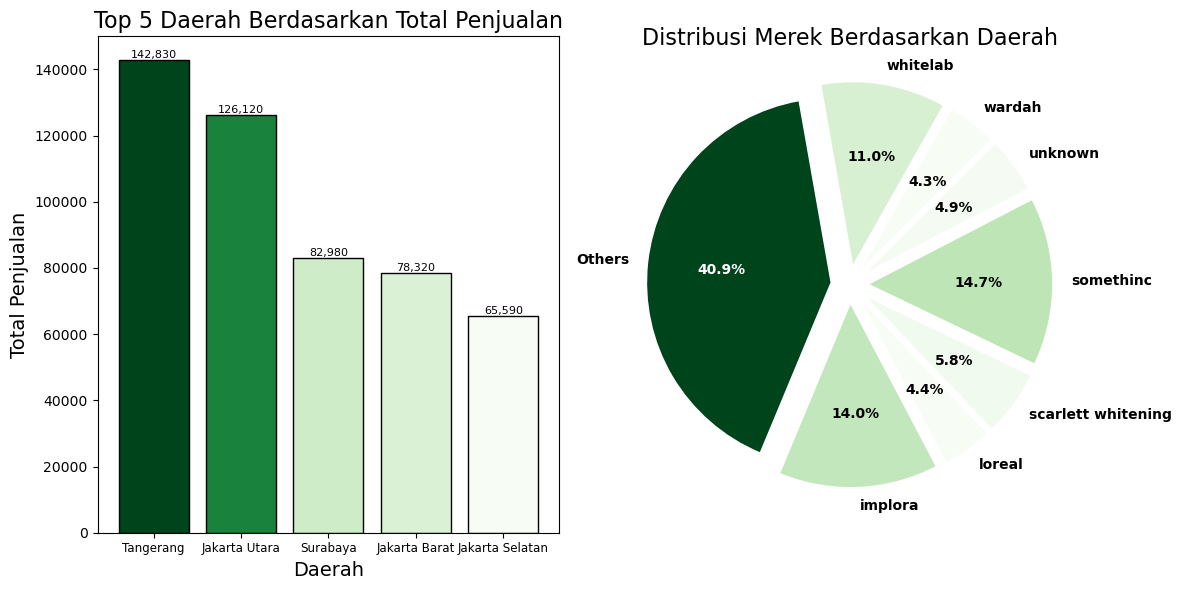

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Menghitung total penjualan per daerah
provinsi_penjualan = df.groupby('daerah')['produkterjual'].sum().reset_index()
provinsi_penjualan = provinsi_penjualan.sort_values(by='produkterjual', ascending=False)

# Mendapatkan Top 5 Daerah dengan penjualan terbesar
top_5_provinsi = provinsi_penjualan.head(5)

# Menampilkan Top 5 Daerah berdasarkan total penjualan
print("Top 5 Daerah Berdasarkan Total Penjualan:")
print(top_5_provinsi)

# Menghitung rata-rata harga per merek di top 5 daerah
merek_harga_per_provinsi = df[df['daerah'].isin(top_5_provinsi['daerah'])].groupby(['daerah', 'merek'])['harga'].mean().reset_index()

# Menghitung jumlah produk terjual berdasarkan merek untuk top 5 daerah
merek_per_provinsi = df[df['daerah'].isin(top_5_provinsi['daerah'])].groupby(['daerah', 'merek'])['produkterjual'].sum().reset_index()

# Visualisasi Bar Chart dan Pie Chart
plt.figure(figsize=(12, 6))  # Ukuran figure diperbesar untuk ruang tambahan

# Bar Chart untuk Top 5 Daerah Berdasarkan Total Penjualan
plt.subplot(1, 2, 1)
norm = plt.Normalize(top_5_provinsi['produkterjual'].min(), top_5_provinsi['produkterjual'].max())
colors = plt.cm.Greens(norm(top_5_provinsi['produkterjual']))  # Menggunakan palet hijau
bars = plt.bar(top_5_provinsi['daerah'], top_5_provinsi['produkterjual'], color=colors, edgecolor='black')

plt.xlabel('Daerah', fontsize=14)
plt.ylabel('Total Penjualan', fontsize=14)
plt.title('Top 5 Daerah Berdasarkan Total Penjualan', fontsize=16)
plt.xticks(fontsize=8.5)
plt.yticks(fontsize=10)
plt.grid(False)  # Menghapus grid

# Menambahkan anotasi nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', ha='center', va='bottom', fontsize=8, color='black')

# Pie Chart untuk distribusi merek berdasarkan daerah
plt.subplot(1, 2, 2)

# Menghitung total penjualan berdasarkan merek
merek_counts = merek_per_provinsi.groupby('merek')['produkterjual'].sum().reset_index()

# Hitung persentase penjualan per merek
total_sales = merek_counts['produkterjual'].sum()
merek_counts['percentage'] = (merek_counts['produkterjual'] / total_sales) * 100

# Tentukan kategori dengan persentase di bawah threshold
threshold_percentage = 4
small_types = merek_counts[merek_counts['percentage'] < threshold_percentage]['merek']

# Gabungkan kategori kecil menjadi 'Others'
merek_counts.loc[merek_counts['merek'].isin(small_types), 'merek'] = 'Others'
merek_counts = merek_counts.groupby('merek').sum().reset_index()

# Normalisasi warna untuk pie chart
norm = plt.Normalize(merek_counts['produkterjual'].min(), merek_counts['produkterjual'].max())
colors = plt.cm.Greens(norm(merek_counts['produkterjual']))

# Pie Chart
explode = [0.1] * len(merek_counts)  # Mengatur eksplosi untuk menonjolkan bagian pie
wedges, texts, autotexts = plt.pie(merek_counts['produkterjual'], labels=merek_counts['merek'], 
                                    autopct='%1.1f%%', startangle=100, explode=explode, 
                                    wedgeprops={'edgecolor': 'w'}, colors=colors, 
                                    textprops={'fontweight': 'bold'})

plt.title('Distribusi Merek Berdasarkan Daerah', fontsize=16)

# Menyesuaikan warna teks di dalam pie chart
for j, autotext in enumerate(autotexts):
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')
    # Mengubah warna teks berdasarkan warna irisan
    if colors[j][0] < 0.5:  # Jika warna gelap
        autotext.set_color('white')
    else:  # Jika warna terang
        autotext.set_color('black')

# Menyesuaikan jarak antara Bar Chart dan Pie Chart
plt.subplots_adjust(wspace=0.4)  # Mengatur ruang horizontal antara subplot

plt.tight_layout()
plt.show()

#### Distribusi Penjualan Berdasarkan merek Produk dan Daerah pada tiap provinsi 

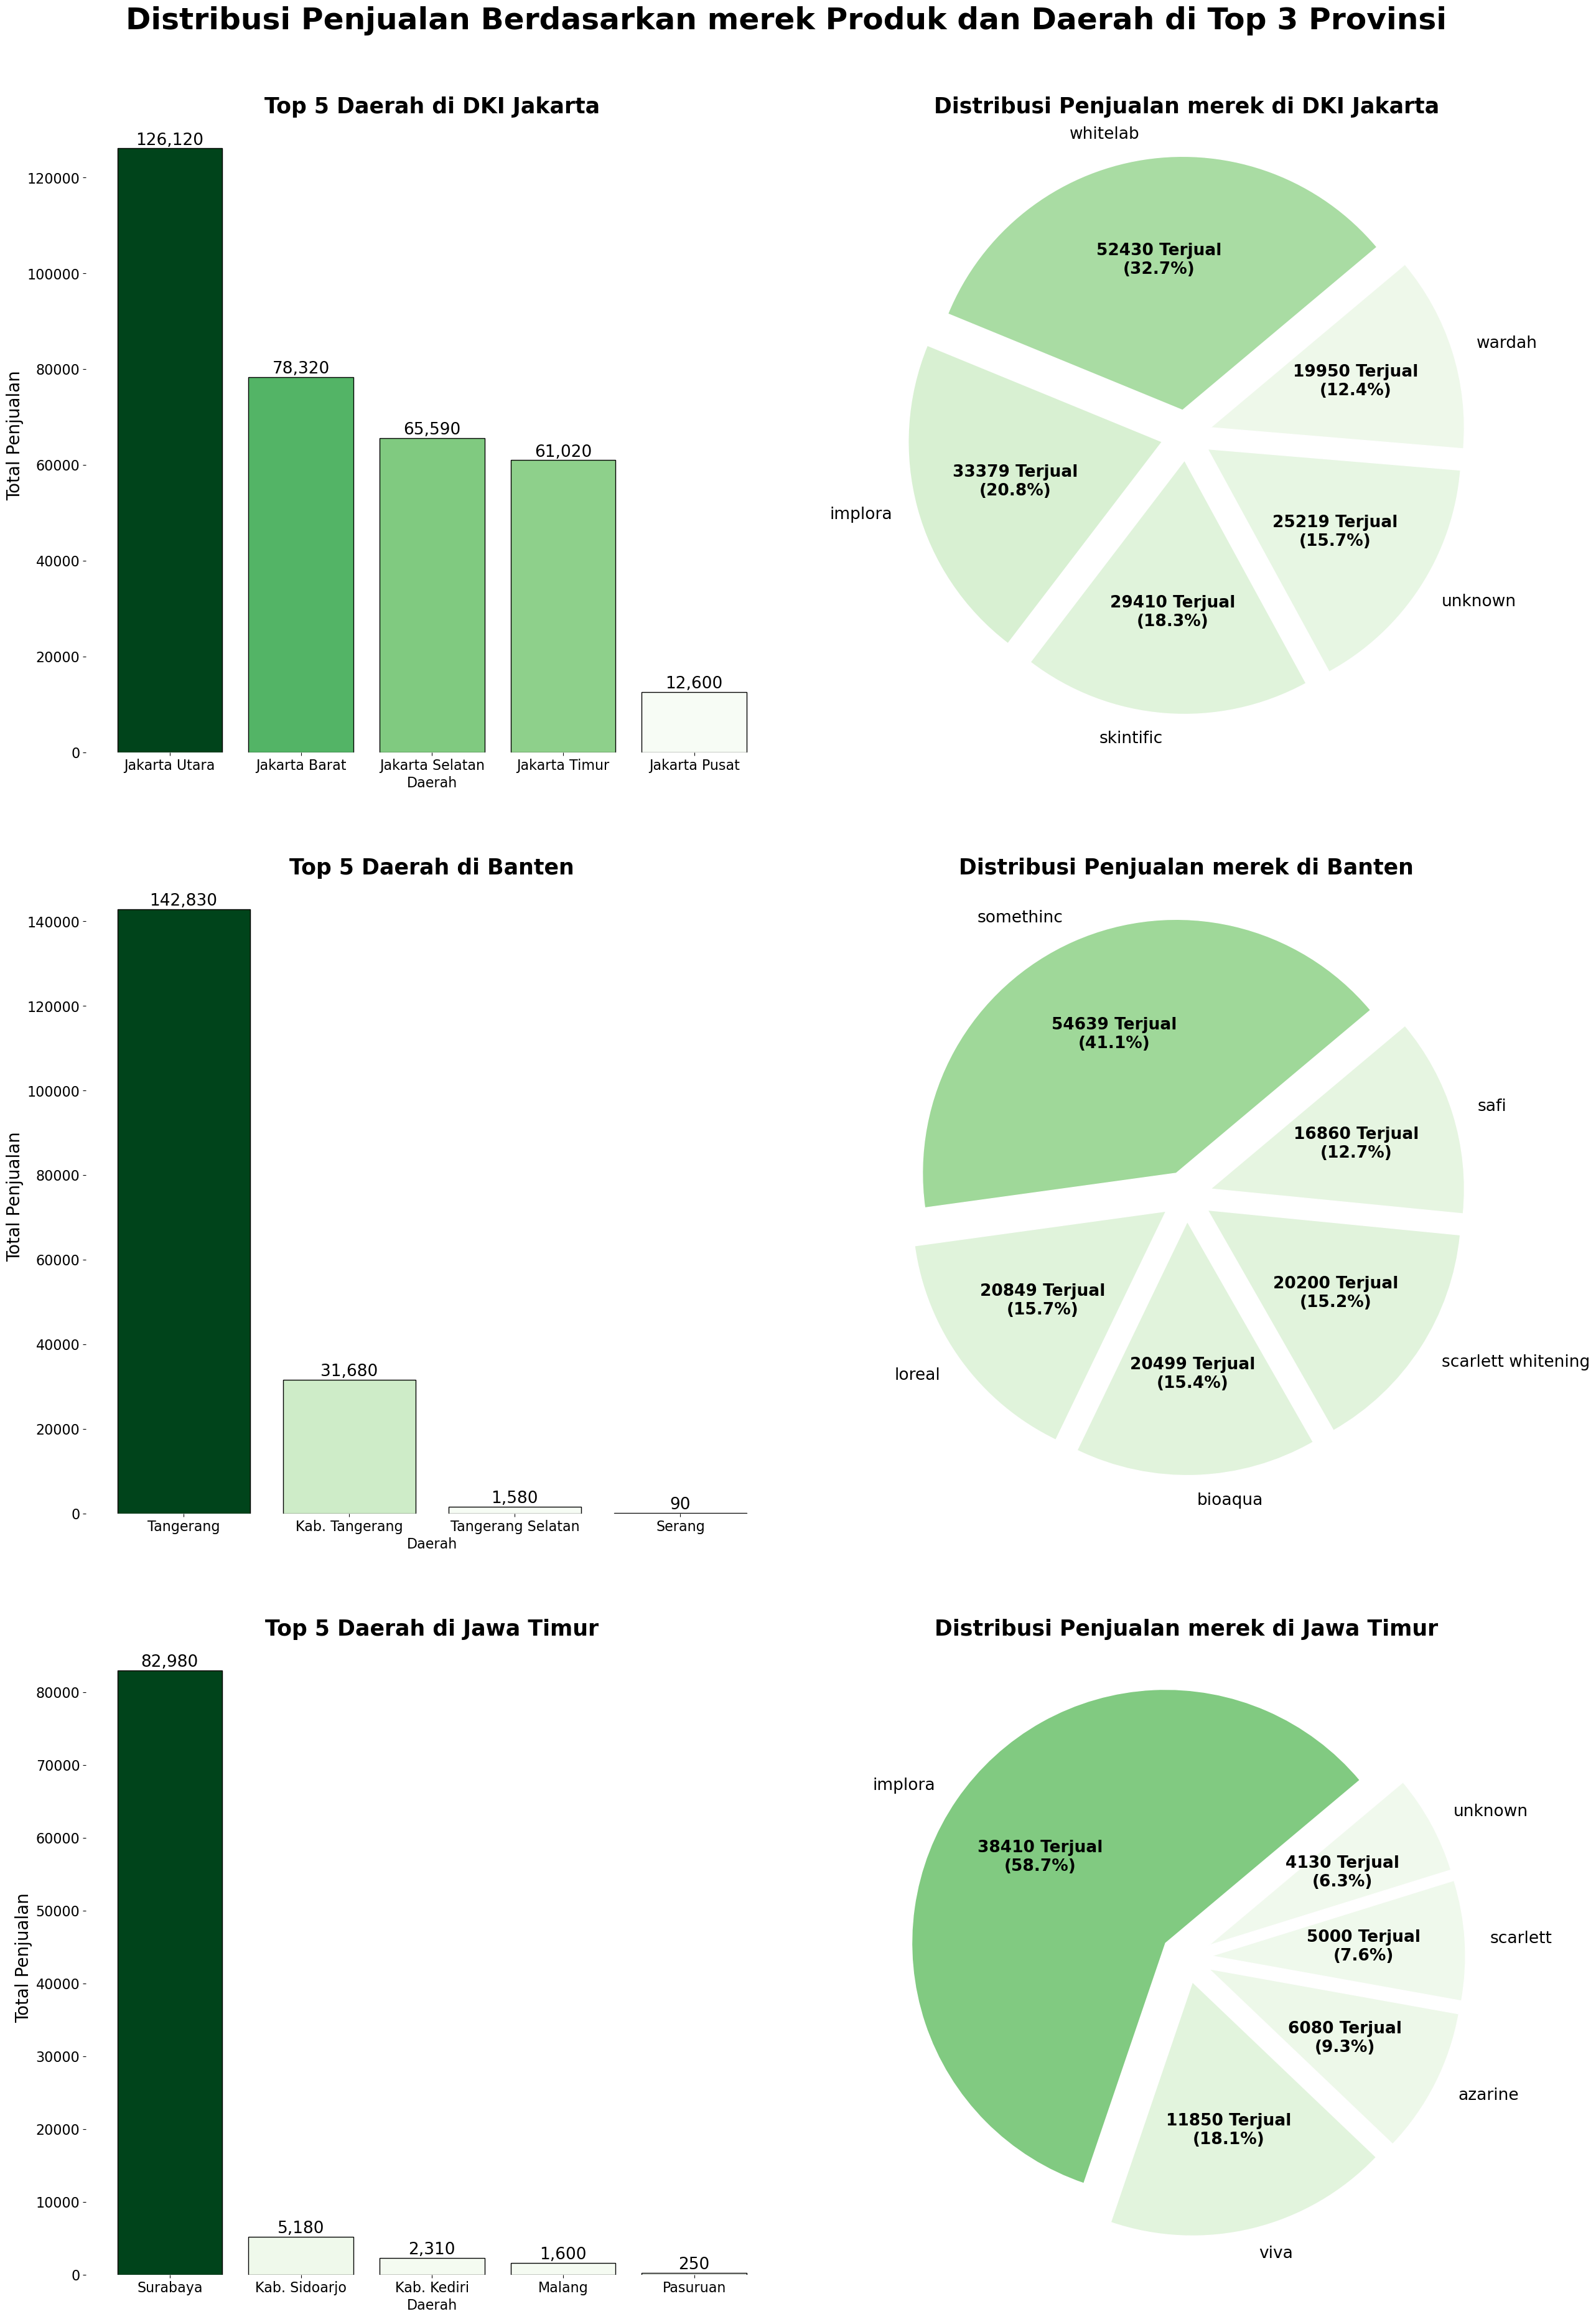

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung total produk terjual per provinsi
provinsi_penjualan = df.groupby('provinsi')['produkterjual'].sum().reset_index()
provinsi_penjualan = provinsi_penjualan.sort_values(by='produkterjual', ascending=False)
top_3_provinsi = provinsi_penjualan.head(3)
top_3_provinsi_list = top_3_provinsi['provinsi'].tolist()

# Filter data untuk top 3 provinsi
top_3_data = df[df['provinsi'].isin(top_3_provinsi_list)]

# Visualisasi
fig, axs = plt.subplots(len(top_3_provinsi_list), 2, figsize=(30, 15 * len(top_3_provinsi_list)))
fig.suptitle('Distribusi Penjualan Berdasarkan merek Produk dan Daerah di Top 3 Provinsi', fontsize=35, y=0.92, fontweight='bold')
fig.subplots_adjust(hspace=0.2, wspace=0.09)

for i, provinsi in enumerate(top_3_provinsi_list):
    prov_data = top_3_data[top_3_data['provinsi'] == provinsi]
    
    # Bar Chart untuk distribusi daerah berdasarkan produk terjual
    bar_data = prov_data.groupby('daerah')['produkterjual'].sum().reset_index()
    bar_data = bar_data.sort_values(by='produkterjual', ascending=False).head(5)
    
    # Normalisasi warna
    norm = plt.Normalize(bar_data['produkterjual'].min(), bar_data['produkterjual'].max())
    bar_colors = plt.cm.Greens(norm(bar_data['produkterjual']))  # Palet hijau
    
    bars = axs[i, 0].bar(
        bar_data['daerah'], 
        bar_data['produkterjual'], 
        color=bar_colors, 
        edgecolor='black'
    )
    axs[i, 0].set_ylabel('Total Penjualan', fontsize=20)
    axs[i, 0].set_xlabel('Daerah', fontsize=16)
    axs[i, 0].set_title(f'Top 5 Daerah di {provinsi}', fontsize=25, fontweight='bold')
    axs[i, 0].tick_params(axis='both', labelsize=16)
    
    # Menghilangkan grid
    axs[i, 0].grid(False)
    
    # Menghilangkan garis latar belakang
    for spine in axs[i, 0].spines.values():
        spine.set_visible(False)

    # Menambahkan anotasi nilai di atas bar
    for bar in bars:
        height = bar.get_height()
        axs[i, 0].text(
            bar.get_x() + bar.get_width() / 2, 
            height, 
            f'{height:,.0f}', 
            ha='center', 
            va='bottom', 
            fontsize=19, 
            color='black'
        )
    
    # Pie Chart untuk distribusi produk terjual berdasarkan merek
    pie_data = prov_data.groupby('merek')['produkterjual'].sum().reset_index()
    pie_data = pie_data.sort_values(by='produkterjual', ascending=False).head(5)

    # Normalisasi warna untuk pie chart
    pie_colors = plt.cm.Greens(norm(pie_data['produkterjual']))  # Palet hijau
    
    # Mengatur eksplosi untuk menonjolkan bagian pie
    explode = [0.1] * len(pie_data)
    
    wedges, texts, autotexts = axs[i, 1].pie(
        pie_data['produkterjual'], 
        labels=pie_data['merek'],  
        autopct=lambda p: f'{int(p * pie_data["produkterjual"].sum() / 100)} Terjual\n({p:.1f}%)',
        colors=pie_colors, 
        startangle=40, 
        explode=explode, 
        wedgeprops={'edgecolor': 'w'}
    )
    axs[i, 1].set_title(f'Distribusi Penjualan merek di {provinsi}', fontsize=25, fontweight='bold')
    
    # Menyesuaikan ukuran font dan jarak label
    for text in texts:
        text.set_fontsize(19)
    for j, autotext in enumerate(autotexts):
        autotext.set_fontsize(19)
        autotext.set_fontweight('bold')  # Menjadikan teks di dalam pie chart bold
        # Mengubah warna teks berdasarkan warna irisan
        if pie_colors[j][0] < 0.5:  # Jika warna gelap
            autotext.set_color('white')
        else:  # Jika warna terang
            autotext.set_color('black')

plt.show()

#### Visualisasi distribusi produkterjual Berdasarkan Daerah

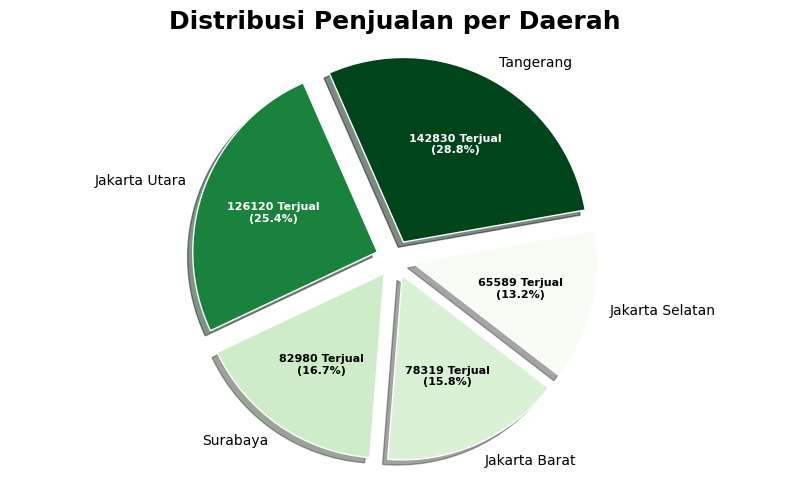

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung total penjualan per daerah
sales_per_daerah = df.groupby('daerah')['produkterjual'].sum().sort_values(ascending=False)

# Menentukan 10 daerah teratas
top_daerahs = sales_per_daerah.head(5)

# Menghitung persentase penjualan
total_sales = sales_per_daerah.sum()
sales_percentage = (top_daerahs / total_sales) * 100

# Menentukan threshold
threshold_percentage = 5
small_daerahs = sales_percentage[sales_percentage < threshold_percentage]

# Menghitung ulang persentase setelah penggabungan
if not small_daerahs.empty:
    top_daerahs['Lainnya'] = small_daerahs.sum()
    total_sales_updated = top_daerahs.sum()
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100
else:
    total_sales_updated = top_daerahs.sum()
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100

# Normalisasi warna
norm = plt.Normalize(sales_percentage_updated.min(), sales_percentage_updated.max())
colors = plt.cm.Greens(norm(sales_percentage_updated))

# Membuat pie chart
plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(
    sales_percentage_updated,
    labels=sales_percentage_updated.index,
    autopct=lambda p: f'{int(p * total_sales_updated / 100)} Terjual\n({p:.1f}%)',
    startangle=10,
    colors=colors,
    explode=[0.1] * len(sales_percentage_updated),  # Memisahkan setiap irisan
    shadow=True,  # Menambahkan bayangan untuk efek 3D
    wedgeprops={'edgecolor': 'white'}  # Garis pemisah antar irisan
)

# Menambahkan title untuk pie chart
plt.title('Distribusi Penjualan per Daerah', fontsize=18, weight='bold')

# Mengatur gaya teks pada pie chart
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(8)
    autotext.set_fontweight('bold')
    # Mengubah warna teks berdasarkan warna irisan
    if colors[i][0] < 0.5:  # Jika warna gelap
        autotext.set_color('white')
    else:  # Jika warna terang
        autotext.set_color('black')

# Menampilkan plot
plt.axis('equal')  # Equal aspect ratio untuk pie chart
plt.tight_layout()
plt.show()

#### Distribusi Daerah Berdasarkan Jumlah Produk Terjual

#### Rata rata harga pada top 5 provinsi

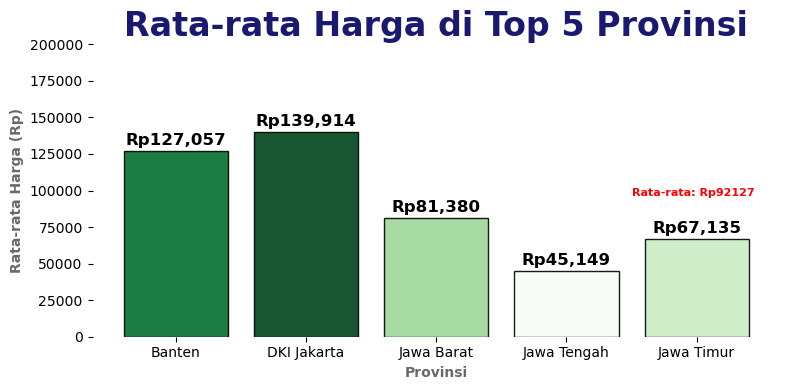

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Menghitung total produk terjual per provinsi
total_terjual_per_provinsi = df.groupby('provinsi')['produkterjual'].sum().reset_index()

# Memilih 5 provinsi teratas berdasarkan produk terjual terbanyak
top_5_provinsi = total_terjual_per_provinsi.nlargest(5, 'produkterjual')

# Filter data untuk 5 provinsi teratas
df_top_5_provinsi = df[df['provinsi'].isin(top_5_provinsi['provinsi'])]

# Menghitung rata-rata harga per provinsi di 5 provinsi teratas
avg_harga_top_5 = df_top_5_provinsi.groupby('provinsi')['harga'].mean().reset_index()

# Gabungkan total produk terjual ke dalam data rata-rata harga
avg_harga_top_5 = avg_harga_top_5.merge(top_5_provinsi, on='provinsi')

# Membuat gradien warna berdasarkan harga
norm = plt.Normalize(avg_harga_top_5['harga'].min(), avg_harga_top_5['harga'].max())
colors = plt.cm.Greens(norm(avg_harga_top_5['harga']))  # Menggunakan palet hijau

# Membuat visualisasi
plt.figure(figsize=(8, 4))

# Grafik: Rata-rata Harga di Top 5 Provinsi
barplot = plt.bar(avg_harga_top_5['provinsi'], avg_harga_top_5['harga'], 
                  color=colors, edgecolor='black', alpha=0.9)

# Menambahkan title dan label
plt.title('Rata-rata Harga di Top 5 Provinsi', fontsize=24, weight='bold', color='midnightblue')
plt.xlabel('Provinsi', fontsize=10, weight='bold', color='dimgray')
plt.ylabel('Rata-rata Harga (Rp)', fontsize=10, weight='bold', color='dimgray')

# Mengatur batas sumbu Y mulai dari 0 dan ditetapkan hingga 90.000
plt.ylim(0, 200000)

# Mengatur interval sumbu Y
plt.yticks(np.arange(0, 200001, 25000))  # Set interval setiap 10.000

# Menambahkan anotasi di atas bar untuk rata-rata harga
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000,
             f'Rp{yval:,.0f}', ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Menambahkan garis horizontal untuk rata-rata
mean_value = avg_harga_top_5['harga'].mean()
plt.text(3.5, mean_value + 4000, 'Rata-rata: Rp{:.0f}'.format(mean_value), color='red', fontsize=8, fontweight='bold')

# Menghilangkan grid dan spines untuk tampilan bersih
ax = plt.gca()  # Ambil objek Axes saat ini
ax.grid(False)  # Menghapus grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_facecolor('none')  # Latar belakang transparan

# Menampilkan plot
plt.tight_layout()
plt.show()

## Pengelompokan Analisis berdasarkan Top 3 Provinsi teratas

#### Identifikasi tiga provinsi dengan penjualan terbanyak

In [62]:
sales_per_provinsi = df.groupby('provinsi')['produkterjual'].sum().sort_values(ascending=False)
top_provinsi = sales_per_provinsi.head(3)  # Provinsi dengan penjualan terbanyak
print("Tiga provinsi dengan penjualan terbanyak:")
print(top_provinsi)

Tiga provinsi dengan penjualan terbanyak:
provinsi
DKI Jakarta    343650
Banten         176180
Jawa Timur      92890
Name: produkterjual, dtype: int32


### DKI Jakarta

#### merek yang Terjual di DKI Jakarta

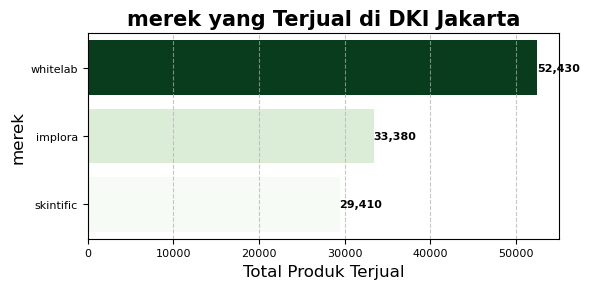

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk provinsi DKI Jakarta
dki_jakarta_data = df[df['provinsi'] == 'DKI Jakarta']

# Menghitung total produk terjual per merek di DKI Jakarta
merek_dki_jakarta = dki_jakarta_data.groupby('merek')['produkterjual'].sum().reset_index()
merek_dki_jakarta = merek_dki_jakarta.sort_values(by='produkterjual', ascending=False)

# Mengambil top 5 merek
top_5_merek = merek_dki_jakarta.head(3)

# Normalisasi warna: semakin besar produk terjual, semakin gelap
norm = plt.Normalize(top_5_merek['produkterjual'].min(), top_5_merek['produkterjual'].max())
colors = plt.cm.Greens(norm(top_5_merek['produkterjual']))  # Menggunakan palet hijau

# Visualisasi
plt.figure(figsize=(6, 3))  # Ukuran figure
sns.barplot(x='produkterjual', y='merek', data=top_5_merek, palette=colors)  # Gunakan warna yang sudah dinormalisasi

# Menambahkan anotasi
for index, value in enumerate(top_5_merek['produkterjual']):
    plt.text(value, index, f'{value:,.0f}', va='center', fontsize=8, weight='bold')

# Judul dan label
plt.title('merek yang Terjual di DKI Jakarta', fontsize=15, weight='bold')
plt.xlabel('Total Produk Terjual', fontsize=12)
plt.ylabel('merek', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)  # Kecilkan ukuran font label di sumbu Y
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

#### Distribusi Penjualan Produk Berdasarkan Daerah di DKI Jakarta

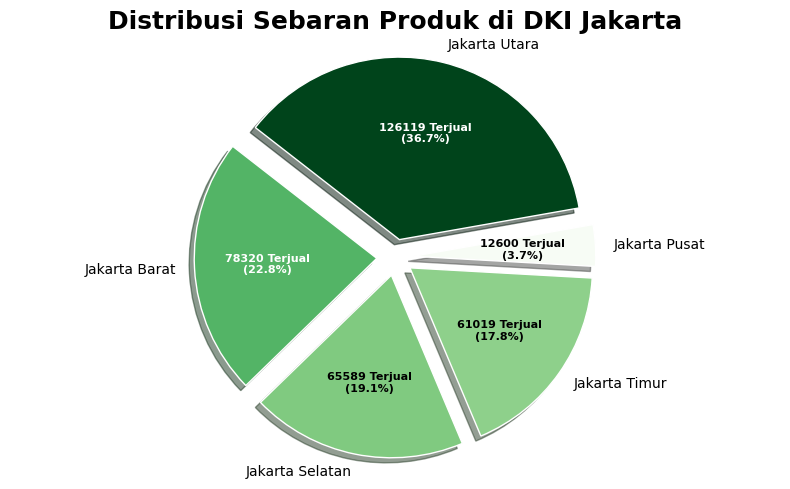

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk semua produk yang terjual di provinsi DKI Jakarta
df_jakarta = df[df['provinsi'] == 'DKI Jakarta']

# Menghitung total penjualan per daerah
sales_per_daerah = df_jakarta.groupby('daerah')['produkterjual'].sum().sort_values(ascending=False)

# Menentukan 7 daerah teratas
top_daerahs = sales_per_daerah.head(5)

# Menghitung persentase penjualan
total_sales = sales_per_daerah.sum()
sales_percentage = (top_daerahs / total_sales) * 100

# Menentukan threshold untuk kategori 'Lainnya' jika perlu
threshold_percentage = 1
small_daerahs = sales_percentage[sales_percentage < threshold_percentage]

# Menggabungkan daerah dengan penjualan kecil ke dalam kategori 'Lainnya'
if not small_daerahs.empty:
    top_daerahs['Lainnya'] = small_daerahs.sum()
    total_sales_updated = top_daerahs.sum()
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100
else:
    total_sales_updated = top_daerahs.sum()
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100

# Normalisasi warna untuk pie chart
norm = plt.Normalize(sales_percentage_updated.min(), sales_percentage_updated.max())
colors = plt.cm.Greens(norm(sales_percentage_updated))

# Membuat pie chart
plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(
    sales_percentage_updated,
    labels=sales_percentage_updated.index,
    autopct=lambda p: f'{int(p * total_sales_updated / 100)} Terjual\n({p:.1f}%)',
    startangle=10,
    colors=colors,
    explode=[0.1] * len(sales_percentage_updated),  # Memisahkan setiap irisan
    shadow=True,  # Menambahkan bayangan untuk efek 3D
    wedgeprops={'edgecolor': 'white'}  # Garis pemisah antar irisan
)

# Menambahkan judul untuk pie chart
plt.title('Distribusi Sebaran Produk di DKI Jakarta', fontsize=18, weight='bold')

# Mengatur gaya teks pada pie chart
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(8)
    autotext.set_fontweight('bold')
    # Mengubah warna teks berdasarkan warna irisan
    if colors[i][0] < 0.5:  # Jika warna gelap
        autotext.set_color('white')
    else:  # Jika warna terang
        autotext.set_color('black')

# Menampilkan plot
plt.axis('equal')  # Equal aspect ratio untuk pie chart
plt.tight_layout()
plt.show()

#### Filter data untuk provinsi DKI Jakarta dan merek 'unknown'

In [65]:
# Mengambil data untuk produk dengan merek 'unknown' di DKI Jakarta
unknown_merek_dki_jakarta = df[(df['provinsi'] == 'DKI Jakarta') & (df['merek'] == 'unknown')]
unknown_dki_jakarta_sorted = unknown_merek_dki_jakarta[['namaproduk', 'produkterjual']].sort_values(by='produkterjual', ascending=False)
unknown_dki_jakarta = unknown_dki_jakarta_sorted.head(20)
unknown_dki_jakarta

,namaproduk,produkterjual
262,duvaderm hyaluronic serum,3000
890,nama cbooster brightening age defying face serum,2000
69,tulus porefecting niacinamide serum,2000
1015,perawatan wajah skincare essence serum rossceu...,2000
534,eva mulia serum serum mencerahkan wajah vitamin,1000
3273,serum wajah kefir goodlife 50gr,1000
1678,serum collagen vitamin 30 kulit wajah kenyal c...,1000
1726,luckyman serum pria moonlight mencerahkan waja...,1000
3827,serum wajah glow glass skin mulgwa korea membu...,1000
5208,serum wajah mulgwa glowing korea membuat wajah...,1000


In [66]:
df

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi
0,flash elsheskin radiant skin serum 15ml niacin...,109000,100,Tangerang,16,ElsheSkin,15 ml,elsheskin,Banten
1,bromen facial wash brightening serum pemutih w...,39000,250,Jakarta Pusat,0,Bromen Official Store,None,bromen,DKI Jakarta
2,the originote acne b5 serum 20ml serum wajah b...,37000,5000,Jakarta Timur,42,The Originote Official Shop,20 ml,the originote,DKI Jakarta
5,skintific 12 aha bha pha lha peeling 30ml seru...,128001,8000,Jakarta Timur,57,Skintific Official Store,30 ml,skintific,DKI Jakarta
6,upgraded formula whitelab n10dose brightening ...,75000,50000,Jakarta Utara,45,Whitelab Official Store,20 ml,whitelab,DKI Jakarta
...,...,...,...,...,...,...,...,...,...
7295,the ordinary hyaluronic acid 2b5 serum wajah,58000,60,Jakarta Utara,0,tk_untung,None,the ordinary,DKI Jakarta
7317,neolife serum wajah anti aging neolife serum a...,120000,90,Jakarta Barat,0,DUTA HERBAL88,None,unknown,DKI Jakarta
7319,yoshita whitening serum collagen pemutih wajah,80000,1000,Jakarta Pusat,0,Herbal.manjur01,None,yoshita,DKI Jakarta
7361,aish skincare darkpsot serum wajah mengatasi n...,99000,500,Bandung,0,QUEENZA BEAUTY 88,None,unknown,Jawa Barat


#### Distribusi diskon(%)	 di Provinsi DKI Jakarta

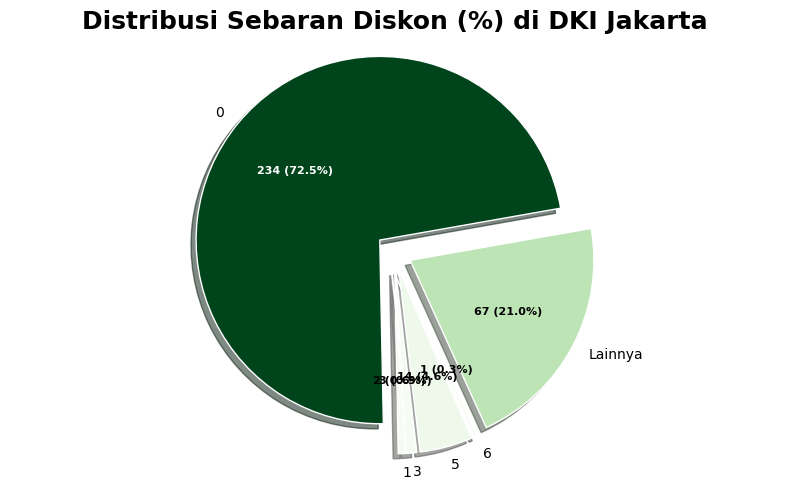

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data untuk semua produk yang terjual di provinsi DKI Jakarta
df_jakarta = df[df['provinsi'] == 'DKI Jakarta']

# Menghitung frekuensi diskon yang muncul
discount_counts = df_jakarta['diskon(%)'].value_counts().sort_index()

# Menentukan 5 diskon teratas
top_discounts = discount_counts.head(5)

# Menentukan threshold untuk kategori 'Lainnya' jika perlu
threshold_count = 5  # Misalnya ambang batas adalah 5
small_discounts = discount_counts[discount_counts < threshold_count]

# Menggabungkan diskon kecil ke dalam kategori 'Lainnya'
if not small_discounts.empty:
    top_discounts['Lainnya'] = small_discounts.sum()
    total_discounts_updated = top_discounts.sum()
    discount_percentage_updated = (top_discounts / total_discounts_updated) * 100
else:
    total_discounts_updated = top_discounts.sum()
    discount_percentage_updated = (top_discounts / total_discounts_updated) * 100

# Normalisasi warna untuk pie chart
norm = plt.Normalize(discount_percentage_updated.min(), discount_percentage_updated.max())
colors = plt.cm.Greens(norm(discount_percentage_updated))

# Membuat pie chart
plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(
    discount_percentage_updated,
    labels=discount_percentage_updated.index,
    autopct=lambda p: f'{int(p * total_discounts_updated / 100)} ({p:.1f}%)',
    startangle=10,
    colors=colors,
    explode=[0.1] * len(discount_percentage_updated),  # Memisahkan setiap irisan
    shadow=True,  # Menambahkan bayangan untuk efek 3D
    wedgeprops={'edgecolor': 'white'}  # Garis pemisah antar irisan
)

# Menambahkan judul untuk pie chart
plt.title('Distribusi Sebaran Diskon (%) di DKI Jakarta', fontsize=18, weight='bold')

# Mengatur gaya teks pada pie chart
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(8)
    autotext.set_fontweight('bold')
    # Mengubah warna teks berdasarkan warna irisan
    if colors[i][0] < 0.5:  # Jika warna gelap
        autotext.set_color('white')
    else:  # Jika warna terang
        autotext.set_color('black')

# Menampilkan plot
plt.axis('equal')  # Equal aspect ratio untuk pie chart
plt.tight_layout()
plt.show()

#### Rata rata Harga di 5 Daerah Teratas di Provinsi DKI Jakarta

C:\Users\hp\AppData\Local\Temp\ipykernel_29712\373398542.py:48: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



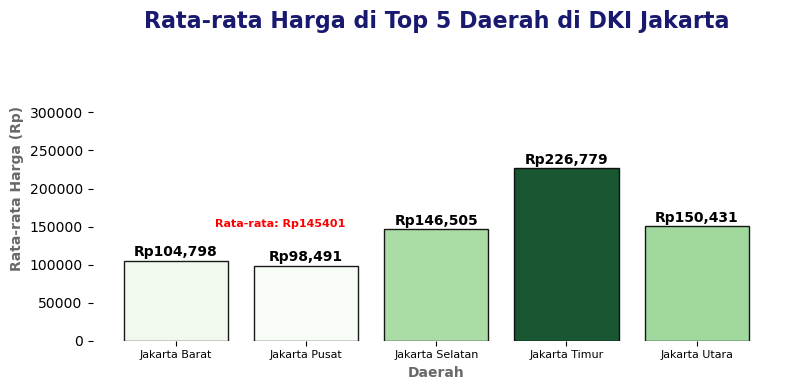

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter data untuk provinsi DKI Jakarta
dki_jakarta_data = df[df['provinsi'] == 'DKI Jakarta']

# Menghitung total produk terjual per daerah di DKI Jakarta
total_terjual_per_daerah = dki_jakarta_data.groupby('daerah')['produkterjual'].sum().reset_index()

# Memilih 5 daerah teratas berdasarkan produk terjual terbanyak
top_5_daerah = total_terjual_per_daerah.nlargest(5, 'produkterjual')

# Filter data untuk 5 daerah teratas
df_top_5_daerah = dki_jakarta_data[dki_jakarta_data['daerah'].isin(top_5_daerah['daerah'])]

# Menghitung rata-rata harga per daerah di 5 daerah teratas
avg_harga_top_5_daerah = df_top_5_daerah.groupby('daerah')['harga'].mean().reset_index()

# Gabungkan total produk terjual ke dalam data rata-rata harga
avg_harga_top_5_daerah = avg_harga_top_5_daerah.merge(top_5_daerah, on='daerah')

# Membuat gradien warna berdasarkan harga
norm = plt.Normalize(avg_harga_top_5_daerah['harga'].min(), avg_harga_top_5_daerah['harga'].max())
colors = plt.cm.Greens(norm(avg_harga_top_5_daerah['harga']))  # Menggunakan palet hijau

# Membuat visualisasi
plt.figure(figsize=(8, 4))

# Grafik: Rata-rata Harga di Top 5 Daerah di DKI Jakarta
barplot = plt.bar(avg_harga_top_5_daerah['daerah'], avg_harga_top_5_daerah['harga'], 
                  color=colors, edgecolor='black', alpha=0.9)

# Menambahkan title dan label
plt.title('Rata-rata Harga di Top 5 Daerah di DKI Jakarta', fontsize=16, weight='bold', color='midnightblue')
plt.xlabel('Daerah', fontsize=10, weight='bold', color='dimgray')
plt.ylabel('Rata-rata Harga (Rp)', fontsize=10, weight='bold', color='dimgray')

# Mengatur batas sumbu Y mulai dari 0 dan ditetapkan hingga 120.000
plt.ylim(0, 400000)

# Mengatur interval sumbu Y
plt.yticks(np.arange(0, 300001, 50000))  # Set interval setiap 20.000

# Mengatur ukuran font pada label daerah
ax = plt.gca()
ax.set_xticklabels(avg_harga_top_5_daerah['daerah'], fontsize=8)

# Menambahkan anotasi di atas bar untuk rata-rata harga
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000,
             f'Rp{yval:,.0f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Menambahkan garis horizontal untuk rata-rata
mean_value = avg_harga_top_5_daerah['harga'].mean()
plt.text(0.3, mean_value + 4000, 'Rata-rata: Rp{:.0f}'.format(mean_value), color='red', fontsize=8, fontweight='bold')

# Menghilangkan grid dan spines untuk tampilan bersih
ax.grid(False)  # Menghapus grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_facecolor('none')  # Latar belakang transparan

# Menampilkan plot
plt.tight_layout()
plt.show()

### Banten

#### merek yang Terjual di Banten

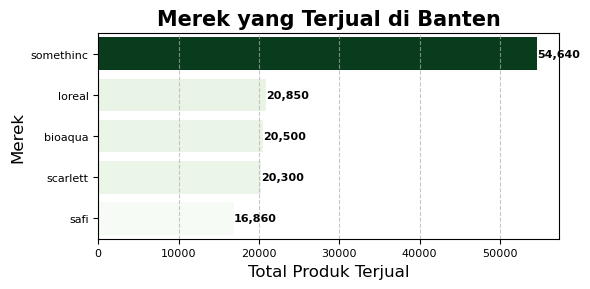

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk provinsi Banten
banten_data = df[df['provinsi'] == 'Banten']

# Menghitung total produk terjual per merek di Banten
merek_banten = banten_data.groupby('merek')['produkterjual'].sum().reset_index()
merek_banten = merek_banten.sort_values(by='produkterjual', ascending=False)

# Mengambil top 5 merek
top_5_merek = merek_banten.head(5)  # Mengubah dari 3 menjadi 5 untuk mencakup 5 merek teratas

# Normalisasi warna: semakin besar produk terjual, semakin gelap
norm = plt.Normalize(top_5_merek['produkterjual'].min(), top_5_merek['produkterjual'].max())
colors = plt.cm.Greens(norm(top_5_merek['produkterjual']))  # Menggunakan palet hijau

# Visualisasi
plt.figure(figsize=(6, 3))  # Ukuran figure
sns.barplot(x='produkterjual', y='merek', data=top_5_merek, palette=colors)  # Gunakan warna yang sudah dinormalisasi

# Menambahkan anotasi
for index, value in enumerate(top_5_merek['produkterjual']):
    plt.text(value, index, f'{value:,.0f}', va='center', fontsize=8, weight='bold')

# Judul dan label
plt.title('Merek yang Terjual di Banten', fontsize=15, weight='bold')
plt.xlabel('Total Produk Terjual', fontsize=12)
plt.ylabel('Merek', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)  # Kecilkan ukuran font label di sumbu Y
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

#### Distribusi Penjualan Produk Berdasarkan Daerah di Banten

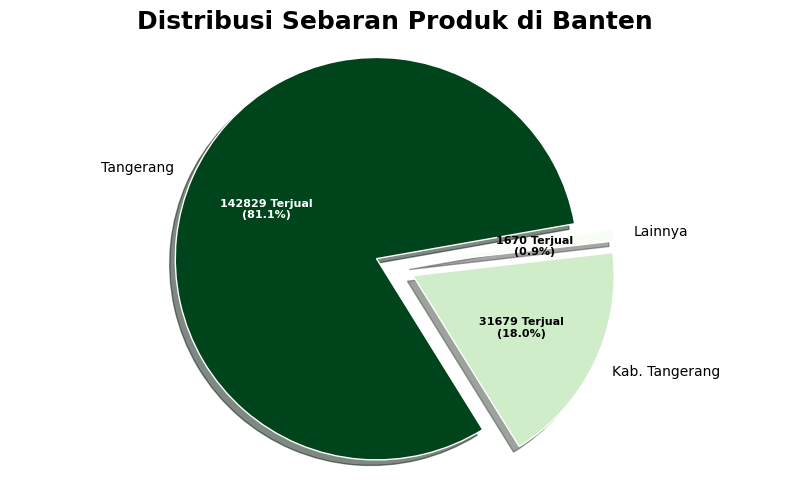

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk semua produk yang terjual di provinsi Banten
df_banten = df[df['provinsi'] == 'Banten']

# Menghitung total penjualan per daerah
sales_per_daerah = df_banten.groupby('daerah')['produkterjual'].sum().sort_values(ascending=False)

# Menghitung total penjualan keseluruhan
total_sales = sales_per_daerah.sum()
top_daerahs = sales_per_daerah.head(2)

# Menghitung persentase penjualan untuk daerah teratas
sales_percentage = (top_daerahs / total_sales) * 100

# Menentukan threshold untuk kategori 'Lainnya' jika perlu
threshold_percentage = 1  # Persentase threshold diubah menjadi 15%
small_daerahs = sales_per_daerah[sales_per_daerah / total_sales * 100 < threshold_percentage]

# Menggabungkan daerah dengan penjualan kecil ke dalam kategori 'Lainnya'
if not small_daerahs.empty:
    # Menggunakan pd.concat untuk menambahkan total penjualan daerah kecil ke dalam kategori 'Lainnya'
    small_sum = pd.Series(small_daerahs.sum(), index=['Lainnya'])
    top_daerahs = pd.concat([top_daerahs, small_sum])  
    total_sales_updated = top_daerahs.sum()  # Menghitung total penjualan yang diperbarui
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100  # Menghitung persentase yang diperbarui
else:
    total_sales_updated = top_daerahs.sum()  # Total penjualan tetap
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100  # Menghitung persentase tetap

# Normalisasi warna untuk pie chart
norm = plt.Normalize(sales_percentage_updated.min(), sales_percentage_updated.max())
colors = plt.cm.Greens(norm(sales_percentage_updated))

# Membuat pie chart
plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(
    sales_percentage_updated,
    labels=sales_percentage_updated.index,
    autopct=lambda p: f'{int(p * total_sales_updated / 100)} Terjual\n({p:.1f}%)',
    startangle=10,
    colors=colors,
    explode=[0.1] * len(sales_percentage_updated),  # Memisahkan setiap irisan
    shadow=True,  # Menambahkan bayangan untuk efek 3D
    wedgeprops={'edgecolor': 'white'}  # Garis pemisah antar irisan
)

# Menambahkan judul untuk pie chart
plt.title('Distribusi Sebaran Produk di Banten', fontsize=18, weight='bold')

# Mengatur gaya teks pada pie chart
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(8)
    autotext.set_fontweight('bold')
    # Mengubah warna teks berdasarkan warna irisan
    if colors[i][0] < 0.5:  # Jika warna gelap
        autotext.set_color('white')
    else:  # Jika warna terang
        autotext.set_color('black')

# Menampilkan plot
plt.axis('equal')  # Equal aspect ratio untuk pie chart
plt.tight_layout()
plt.show()

#### Filter data untuk provinsi Banten dan merek 'unknown'

In [71]:
# Mengambil data untuk produk dengan merek 'unknown' di Banten
unknown_merek_banten = df[(df['provinsi'] == 'Banten') & (df['merek'] == 'unknown')]
unknown_banten_sorted = unknown_merek_banten[['namaproduk', 'produkterjual']].sort_values(by='produkterjual', ascending=False)
unknown_banten = unknown_banten_sorted.head(20)

# Menampilkan 20 produk teratas
unknown_banten

,namaproduk,produkterjual
93,blp skin tremella daily hydrating serum face s...,500
609,face serum b erl cosmetics berlcosmetics berl ...,500
3498,ssa scarlet serum acne wajah berminyak whiteni...,250
2977,iface vitamin serum 10 ml serum wajah mencerah...,250
224,vibrant glamour retinol cream retinol serum wajah,100
527,iface vitamin serum 10 ml serum kulit serum wa...,100
2269,serum wajah glowing brightening face serum ryo...,100
2521,the inkey list hyaluronic acid serum,80
897,the inkey list hyaluronic acid serum 30ml,80
162,jumiso waterfull hyaluronic acid serum,80


#### Distribusi diskon(%)	 di Provinsi Banten

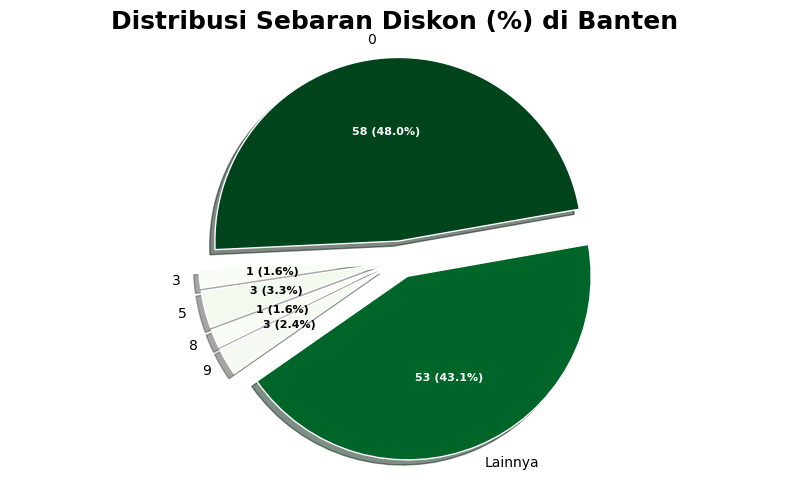

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data untuk semua produk yang terjual di provinsi Banten
df_banten = df[df['provinsi'] == 'Banten']

# Menghitung frekuensi diskon yang muncul
discount_counts = df_banten['diskon(%)'].value_counts().sort_index()

# Menentukan 5 diskon teratas
top_discounts = discount_counts.head(5)

# Menentukan threshold untuk kategori 'Lainnya' jika perlu
threshold_count = 5  # Misalnya ambang batas adalah 5
small_discounts = discount_counts[discount_counts < threshold_count]

# Menggabungkan diskon kecil ke dalam kategori 'Lainnya'
if not small_discounts.empty:
    top_discounts['Lainnya'] = small_discounts.sum()
    total_discounts_updated = top_discounts.sum()
    discount_percentage_updated = (top_discounts / total_discounts_updated) * 100
else:
    total_discounts_updated = top_discounts.sum()
    discount_percentage_updated = (top_discounts / total_discounts_updated) * 100

# Normalisasi warna untuk pie chart
norm = plt.Normalize(discount_percentage_updated.min(), discount_percentage_updated.max())
colors = plt.cm.Greens(norm(discount_percentage_updated))

# Membuat pie chart
plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(
    discount_percentage_updated,
    labels=discount_percentage_updated.index,
    autopct=lambda p: f'{int(p * total_discounts_updated / 100)} ({p:.1f}%)',
    startangle=10,
    colors=colors,
    explode=[0.1] * len(discount_percentage_updated),  # Memisahkan setiap irisan
    shadow=True,  # Menambahkan bayangan untuk efek 3D
    wedgeprops={'edgecolor': 'white'}  # Garis pemisah antar irisan
)

# Menambahkan judul untuk pie chart
plt.title('Distribusi Sebaran Diskon (%) di Banten', fontsize=18, weight='bold')

# Mengatur gaya teks pada pie chart
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(8)
    autotext.set_fontweight('bold')
    # Mengubah warna teks berdasarkan warna irisan
    if colors[i][0] < 0.5:  # Jika warna gelap
        autotext.set_color('white')
    else:  # Jika warna terang
        autotext.set_color('black')

# Menampilkan plot
plt.axis('equal')  # Equal aspect ratio untuk pie chart
plt.tight_layout()
plt.show()

#### Rata rata Harga di 5 Daerah Teratas di Provinsi Banten

C:\Users\hp\AppData\Local\Temp\ipykernel_15364\299619779.py:48: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



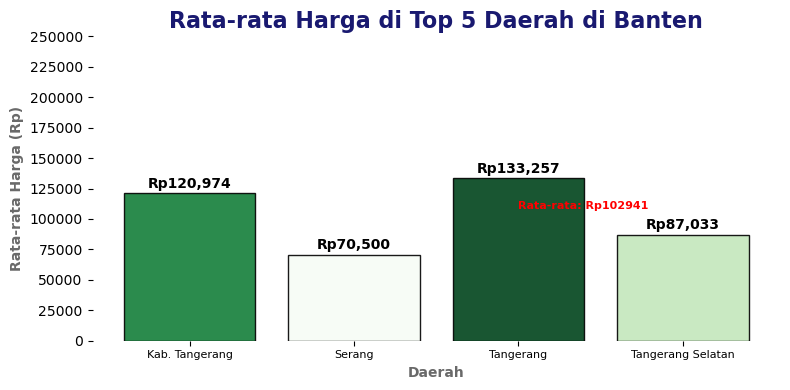

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter data untuk provinsi Banten
banten_data = df[df['provinsi'] == 'Banten']

# Menghitung total produk terjual per daerah di Banten
total_terjual_per_daerah = banten_data.groupby('daerah')['produkterjual'].sum().reset_index()

# Memilih 5 daerah teratas berdasarkan produk terjual terbanyak
top_5_daerah = total_terjual_per_daerah.nlargest(5, 'produkterjual')

# Filter data untuk 5 daerah teratas
df_top_5_daerah = banten_data[banten_data['daerah'].isin(top_5_daerah['daerah'])]

# Menghitung rata-rata harga per daerah di 5 daerah teratas
avg_harga_top_5_daerah = df_top_5_daerah.groupby('daerah')['harga'].mean().reset_index()

# Gabungkan total produk terjual ke dalam data rata-rata harga
avg_harga_top_5_daerah = avg_harga_top_5_daerah.merge(top_5_daerah, on='daerah')

# Membuat gradien warna berdasarkan harga
norm = plt.Normalize(avg_harga_top_5_daerah['harga'].min(), avg_harga_top_5_daerah['harga'].max())
colors = plt.cm.Greens(norm(avg_harga_top_5_daerah['harga']))  # Menggunakan palet hijau

# Membuat visualisasi
plt.figure(figsize=(8, 4))

# Grafik: Rata-rata Harga di Top 5 Daerah di Banten
barplot = plt.bar(avg_harga_top_5_daerah['daerah'], avg_harga_top_5_daerah['harga'], 
                  color=colors, edgecolor='black', alpha=0.9)

# Menambahkan title dan label
plt.title('Rata-rata Harga di Top 5 Daerah di Banten', fontsize=16, weight='bold', color='midnightblue')
plt.xlabel('Daerah', fontsize=10, weight='bold', color='dimgray')
plt.ylabel('Rata-rata Harga (Rp)', fontsize=10, weight='bold', color='dimgray')

# Mengatur batas sumbu Y mulai dari 0 dan ditetapkan hingga 250.000
plt.ylim(0, 250000)

# Mengatur interval sumbu Y
plt.yticks(np.arange(0, 250001, 25000))  # Set interval setiap 25.000

# Mengatur ukuran font pada label daerah
ax = plt.gca()
ax.set_xticklabels(avg_harga_top_5_daerah['daerah'], fontsize=8)

# Menambahkan anotasi di atas bar untuk rata-rata harga
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000,
             f'Rp{yval:,.0f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Menambahkan garis horizontal untuk rata-rata
mean_value = avg_harga_top_5_daerah['harga'].mean()
plt.text(2, mean_value + 5000, 'Rata-rata: Rp{:.0f}'.format(mean_value), color='red', fontsize=8, fontweight='bold')

# Menghilangkan grid dan spines untuk tampilan bersih
ax.grid(False)  # Menghapus grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_facecolor('none')  # Latar belakang transparan

# Menampilkan plot
plt.tight_layout()
plt.show()

### Jawa Timur

#### merek yang Terjual di Jawa Timur

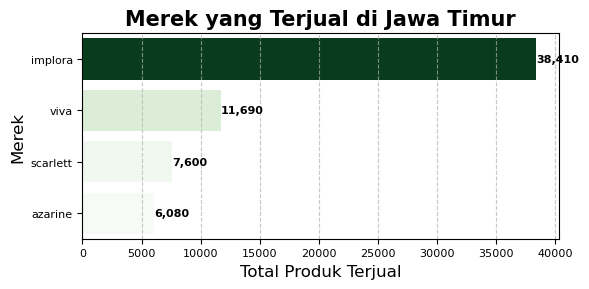

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk provinsi Jawa Timur
jawa_timur_data = df[df['provinsi'] == 'Jawa Timur']

# Menghitung total produk terjual per merek di Jawa Timur
merek_jawa_timur = jawa_timur_data.groupby('merek')['produkterjual'].sum().reset_index()
merek_jawa_timur = merek_jawa_timur.sort_values(by='produkterjual', ascending=False)

# Mengambil top 5 merek
top_5_merek = merek_jawa_timur.head(4)  # Mengambil 5 merek teratas

# Normalisasi warna: semakin besar produk terjual, semakin gelap
norm = plt.Normalize(top_5_merek['produkterjual'].min(), top_5_merek['produkterjual'].max())
colors = plt.cm.Greens(norm(top_5_merek['produkterjual']))  # Menggunakan palet hijau

# Visualisasi
plt.figure(figsize=(6, 3))  # Ukuran figure
sns.barplot(x='produkterjual', y='merek', data=top_5_merek, palette=colors)  # Gunakan warna yang sudah dinormalisasi

# Menambahkan anotasi
for index, value in enumerate(top_5_merek['produkterjual']):
    plt.text(value, index, f'{value:,.0f}', va='center', fontsize=8, weight='bold')

# Judul dan label
plt.title('Merek yang Terjual di Jawa Timur', fontsize=15, weight='bold')
plt.xlabel('Total Produk Terjual', fontsize=12)
plt.ylabel('Merek', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)  # Kecilkan ukuran font label di sumbu Y
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

#### Distribusi Penjualan Produk Berdasarkan Daerah di Jawa Timur

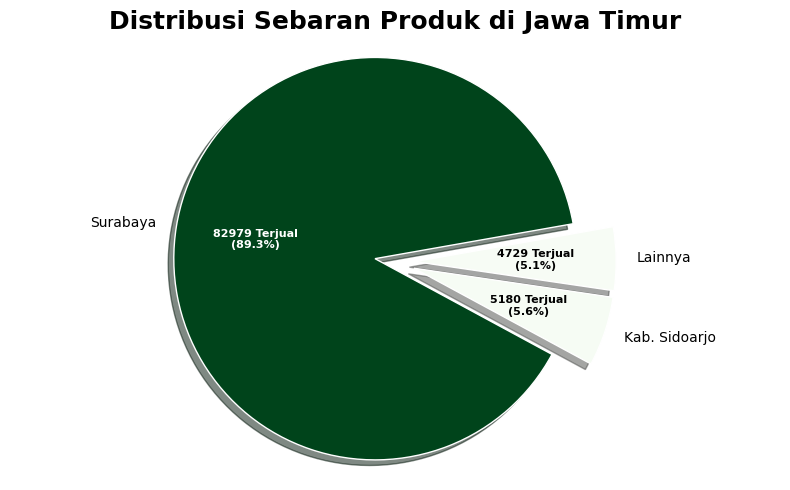

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk semua produk yang terjual di provinsi Jawa Timur
df_jawa_timur = df[df['provinsi'] == 'Jawa Timur']

# Menghitung total penjualan per daerah
sales_per_daerah = df_jawa_timur.groupby('daerah')['produkterjual'].sum().sort_values(ascending=False)

# Menghitung total penjualan keseluruhan
total_sales = sales_per_daerah.sum()
top_daerahs = sales_per_daerah.head(2)

# Menghitung persentase penjualan untuk daerah teratas
sales_percentage = (top_daerahs / total_sales) * 100

# Menentukan threshold untuk kategori 'Lainnya' jika perlu
threshold_percentage = 3  # Persentase threshold
small_daerahs = sales_per_daerah[sales_per_daerah / total_sales * 100 < threshold_percentage]

# Menggabungkan daerah dengan penjualan kecil ke dalam kategori 'Lainnya'
if not small_daerahs.empty:
    # Menggunakan pd.concat untuk menambahkan total penjualan daerah kecil ke dalam kategori 'Lainnya'
    small_sum = pd.Series(small_daerahs.sum(), index=['Lainnya'])
    top_daerahs = pd.concat([top_daerahs, small_sum])  
    total_sales_updated = top_daerahs.sum()  # Menghitung total penjualan yang diperbarui
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100  # Menghitung persentase yang diperbarui
else:
    total_sales_updated = top_daerahs.sum()  # Total penjualan tetap
    sales_percentage_updated = (top_daerahs / total_sales_updated) * 100  # Menghitung persentase tetap

# Normalisasi warna untuk pie chart
norm = plt.Normalize(sales_percentage_updated.min(), sales_percentage_updated.max())
colors = plt.cm.Greens(norm(sales_percentage_updated))

# Membuat pie chart
plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(
    sales_percentage_updated,
    labels=sales_percentage_updated.index,
    autopct=lambda p: f'{int(p * total_sales_updated / 100)} Terjual\n({p:.1f}%)',
    startangle=10,
    colors=colors,
    explode=[0.1] * len(sales_percentage_updated),  # Memisahkan setiap irisan
    shadow=True,  # Menambahkan bayangan untuk efek 3D
    wedgeprops={'edgecolor': 'white'}  # Garis pemisah antar irisan
)

# Menambahkan judul untuk pie chart
plt.title('Distribusi Sebaran Produk di Jawa Timur', fontsize=18, weight='bold')

# Mengatur gaya teks pada pie chart
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(8)
    autotext.set_fontweight('bold')
    # Mengubah warna teks berdasarkan warna irisan
    if colors[i][0] < 0.5:  # Jika warna gelap
        autotext.set_color('white')
    else:  # Jika warna terang
        autotext.set_color('black')

# Menampilkan plot
plt.axis('equal')  # Equal aspect ratio untuk pie chart
plt.tight_layout()
plt.show()

#### Filter data untuk provinsi Jawa Timur dan merek 'unknown'

In [76]:
# Mengambil data untuk produk dengan merek 'unknown' di Jawa Timur
unknown_merek_jatim = df[(df['provinsi'] == 'Jawa Timur') & (df['merek'] == 'unknown')]
unknown_jatim_sorted = unknown_merek_jatim[['namaproduk', 'produkterjual']].sort_values(by='produkterjual', ascending=False)
unknown_jatim = unknown_jatim_sorted.head(20)
unknown_jatim

,namaproduk,produkterjual
683,melanox premium cream whitening serum pemutih ...,750
490,real white niacimide collagen brightening face...,500
2717,bg skin hydrating treatment essence beauty glo...,500
6746,serum hyal beauty rossa whitening hyaluronic a...,500
951,mjoptim hydrolyzed hyaluronic acid ultra serum,250
539,skinesse alfacid smoothing 20 serum memutihkan...,250
868,images serum wajah,100
1293,vip superhero serum marvel edition 20ml face s...,100
2227,thesera hyaluronic pen alat injeksi serum,100
498,images serum wajah moisturising,100


#### Distribusi diskon(%)	 di Provinsi Jawa Timur

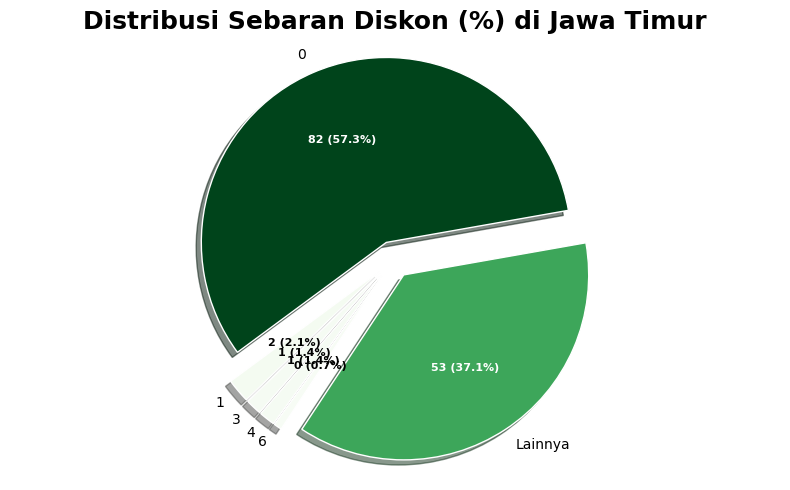

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data untuk semua produk yang terjual di provinsi Jawa Timur
df_jatim = df[df['provinsi'] == 'Jawa Timur']

# Menghitung frekuensi diskon yang muncul
discount_counts = df_jatim['diskon(%)'].value_counts().sort_index()

# Menentukan 5 diskon teratas
top_discounts = discount_counts.head(5)

# Menentukan threshold untuk kategori 'Lainnya' jika perlu
threshold_count = 5  # Misalnya ambang batas adalah 5
small_discounts = discount_counts[discount_counts < threshold_count]

# Menggabungkan diskon kecil ke dalam kategori 'Lainnya'
if not small_discounts.empty:
    top_discounts['Lainnya'] = small_discounts.sum()
    total_discounts_updated = top_discounts.sum()
    discount_percentage_updated = (top_discounts / total_discounts_updated) * 100
else:
    total_discounts_updated = top_discounts.sum()
    discount_percentage_updated = (top_discounts / total_discounts_updated) * 100

# Normalisasi warna untuk pie chart
norm = plt.Normalize(discount_percentage_updated.min(), discount_percentage_updated.max())
colors = plt.cm.Greens(norm(discount_percentage_updated))

# Membuat pie chart
plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(
    discount_percentage_updated,
    labels=discount_percentage_updated.index,
    autopct=lambda p: f'{int(p * total_discounts_updated / 100)} ({p:.1f}%)',
    startangle=10,
    colors=colors,
    explode=[0.1] * len(discount_percentage_updated),  # Memisahkan setiap irisan
    shadow=True,  # Menambahkan bayangan untuk efek 3D
    wedgeprops={'edgecolor': 'white'}  # Garis pemisah antar irisan
)

# Menambahkan judul untuk pie chart
plt.title('Distribusi Sebaran Diskon (%) di Jawa Timur', fontsize=18, weight='bold')

# Mengatur gaya teks pada pie chart
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(8)
    autotext.set_fontweight('bold')
    # Mengubah warna teks berdasarkan warna irisan
    if colors[i][0] < 0.5:  # Jika warna gelap
        autotext.set_color('white')
    else:  # Jika warna terang
        autotext.set_color('black')

# Menampilkan plot
plt.axis('equal')  # Equal aspect ratio untuk pie chart
plt.tight_layout()
plt.show()

#### Rata rata Harga di 5 Daerah Teratas di Provinsi Jawa Timur

C:\Users\hp\AppData\Local\Temp\ipykernel_15364\1793794776.py:48: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



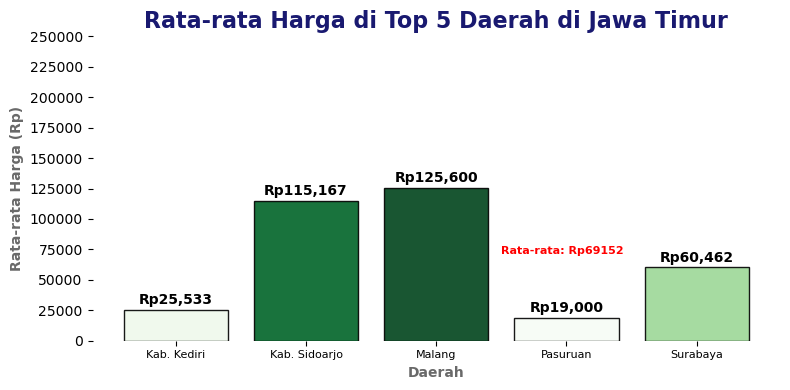

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter data untuk provinsi Banten
banten_data = df[df['provinsi'] == 'Jawa Timur']

# Menghitung total produk terjual per daerah di Banten
total_terjual_per_daerah = banten_data.groupby('daerah')['produkterjual'].sum().reset_index()

# Memilih 5 daerah teratas berdasarkan produk terjual terbanyak
top_5_daerah = total_terjual_per_daerah.nlargest(5, 'produkterjual')

# Filter data untuk 5 daerah teratas
df_top_5_daerah = banten_data[banten_data['daerah'].isin(top_5_daerah['daerah'])]

# Menghitung rata-rata harga per daerah di 5 daerah teratas
avg_harga_top_5_daerah = df_top_5_daerah.groupby('daerah')['harga'].mean().reset_index()

# Gabungkan total produk terjual ke dalam data rata-rata harga
avg_harga_top_5_daerah = avg_harga_top_5_daerah.merge(top_5_daerah, on='daerah')

# Membuat gradien warna berdasarkan harga
norm = plt.Normalize(avg_harga_top_5_daerah['harga'].min(), avg_harga_top_5_daerah['harga'].max())
colors = plt.cm.Greens(norm(avg_harga_top_5_daerah['harga']))  # Menggunakan palet hijau

# Membuat visualisasi
plt.figure(figsize=(8, 4))

# Grafik: Rata-rata Harga di Top 5 Daerah di Banten
barplot = plt.bar(avg_harga_top_5_daerah['daerah'], avg_harga_top_5_daerah['harga'], 
                  color=colors, edgecolor='black', alpha=0.9)

# Menambahkan title dan label
plt.title('Rata-rata Harga di Top 5 Daerah di Jawa Timur', fontsize=16, weight='bold', color='midnightblue')
plt.xlabel('Daerah', fontsize=10, weight='bold', color='dimgray')
plt.ylabel('Rata-rata Harga (Rp)', fontsize=10, weight='bold', color='dimgray')

# Mengatur batas sumbu Y mulai dari 0 dan ditetapkan hingga 250.000
plt.ylim(0, 250000)

# Mengatur interval sumbu Y
plt.yticks(np.arange(0, 250001, 25000))  # Set interval setiap 25.000

# Mengatur ukuran font pada label daerah
ax = plt.gca()
ax.set_xticklabels(avg_harga_top_5_daerah['daerah'], fontsize=8)

# Menambahkan anotasi di atas bar untuk rata-rata harga
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000,
             f'Rp{yval:,.0f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Menambahkan garis horizontal untuk rata-rata
mean_value = avg_harga_top_5_daerah['harga'].mean()
plt.text(2.5, mean_value + 2000, 'Rata-rata: Rp{:.0f}'.format(mean_value), color='red', fontsize=8, fontweight='bold')

# Menghilangkan grid dan spines untuk tampilan bersih
ax.grid(False)  # Menghapus grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_facecolor('none')  # Latar belakang transparan

# Menampilkan plot
plt.tight_layout()
plt.show()

## Menyimpan data

In [79]:
# Menyimpan DataFrame ke file CSV di folder Downloads
df.to_csv(r'C:\Users\hp\Downloads\SerumCleanDataTokped.csv', index=False)
print("File telah berhasil disimpan ke folder Downloads dengan nama 'SerumCleanDataTokped.csv'.")

File telah berhasil disimpan ke folder Downloads dengan nama 'SerumCleanDataTokped.csv'.


In [80]:
# Memfilter ukuran yang berakhiran 'gr'
filtered_df = df[df['ukuran'].str.contains('gr', case=False, na=False)]
filtered_df

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi
521,ponds bright beauty serum day cream krim serum...,42500,100,Jakarta Barat,0,Little Osaka 88,40 gr,ponds,DKI Jakarta
978,serum wajah skin dewi helichrysum brightening ...,181115,1000,Jakarta Barat,11,Skin Dewi Official,5 gr,skin dewi,DKI Jakarta
1080,ponds serum wajah bright beauty triple glow se...,96000,250,Jakarta Selatan,0,Tokopedia NOW!,30 gr,ponds,DKI Jakarta
1283,illuminare brightening serum 30 gram serum wajah,119700,90,Tangerang,5,Pharos Official Store,30 gr,illuminare,Banten
1683,serum wajah skin dewi ginkgo biloba hydrating ...,135800,500,Jakarta Barat,3,Skin Dewi Official,5 gr,skin dewi,DKI Jakarta
2970,serum wajah pria haum aloecid niacinamide 10 5...,148000,100,Jakarta Selatan,0,JS Store Indonesia,50 gr,haum,DKI Jakarta
3273,serum wajah kefir goodlife 50gr,39000,1000,Jakarta Utara,29,kefirlasovire,50 gr,unknown,DKI Jakarta
5413,bioaqua serum wajah 24k gold essence cream 50gr,39999,100,Jakarta Barat,0,Lidra_Beauty,50 gr,bioaqua,DKI Jakarta
7111,pelembab serum wajah cream pelembut vitamin 60...,250000,70,Bogor,0,SUPLEMEN SEHAT 99,57 gr,unknown,Jawa Barat


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



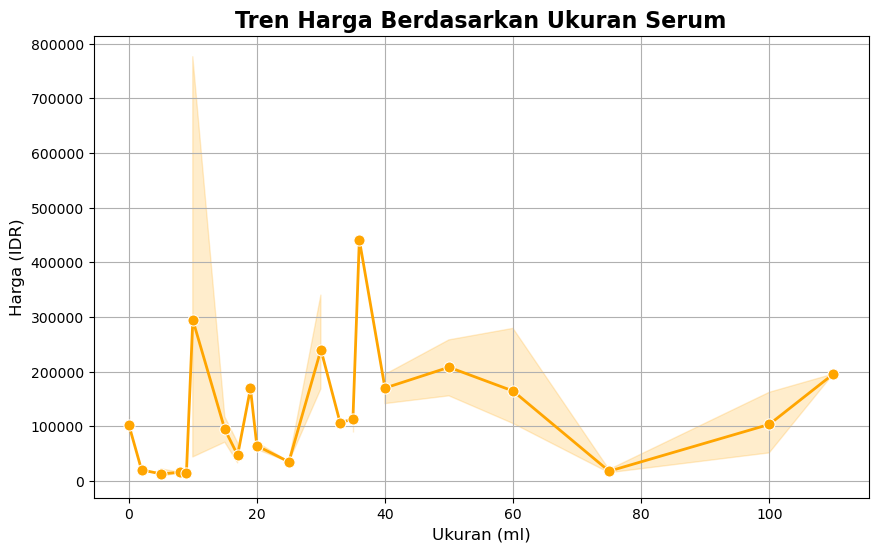

In [81]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

def normalize_size(size):
    # Memastikan bahwa ukuran tidak None atau NaN
    if pd.isna(size) or size is None:
        return None

    size = str(size).strip()  # Mengubah ke string dan menghapus spasi

    # Menangani rentang ukuran
    if '-' in size:
        parts = size.split('-')
        avg_size = (float(parts[0].replace('ml', '').replace('L', '').strip()) + 
                     float(parts[1].replace('ml', '').replace('L', '').strip())) / 2
        return avg_size if 'ml' in size else avg_size * 1000  # Konversi ke ml jika perlu

    # Memeriksa dan mengonversi ukuran ke ml
    match_ml = re.match(r'(\d+)\s*ml', size)
    if match_ml:
        return float(match_ml.group(1))

    match_liter = re.match(r'(\d+)\s*L', size)
    if match_liter:
        return float(match_liter.group(1)) * 1000  # Konversi liter ke ml

    return None  # Jika tidak dikenali

# Misalkan df adalah DataFrame yang sudah ada
df['Ukuran (ml)'] = df['ukuran'].apply(normalize_size)
df['Ukuran (ml)'] = df['Ukuran (ml)'].fillna(0)

# Membuat line plot untuk menunjukkan tren
plt.figure(figsize=(10, 6))
sns.lineplot(x='Ukuran (ml)', y='harga', data=df, marker='o', color='orange', linewidth=2, markersize=8)
plt.title('Tren Harga Berdasarkan Ukuran Serum', fontsize=16, fontweight='bold')
plt.xlabel('Ukuran (ml)', fontsize=12)
plt.ylabel('Harga (IDR)', fontsize=12)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [82]:
import pandas as pd
import re

def normalize_size(size):
    # Memastikan bahwa ukuran tidak None atau NaN
    if pd.isna(size) or size is None:
        return None

    size = str(size).strip()  # Mengubah ke string dan menghapus spasi

    # Menangani rentang ukuran
    if '-' in size:
        parts = size.split('-')
        avg_size = (float(parts[0].replace('ml', '').replace('L', '').strip()) + 
                     float(parts[1].replace('ml', '').replace('L', '').strip())) / 2
        return avg_size if 'ml' in size else avg_size * 1000  # Konversi ke ml jika perlu

    # Memeriksa dan mengonversi ukuran ke ml
    match_ml = re.match(r'(\d+)\s*ml', size)
    if match_ml:
        return float(match_ml.group(1))

    match_liter = re.match(r'(\d+)\s*L', size)
    if match_liter:
        return float(match_liter.group(1)) * 1000  # Konversi liter ke ml

    return None  # Jika tidak dikenali

# Misalkan df adalah DataFrame yang sudah ada
df['Ukuran (ml)'] = df['ukuran'].apply(normalize_size)

# Memfilter ukuran di atas 1000 ml
df_filtered = df[df['Ukuran (ml)'] > 100]

# Menampilkan DataFrame yang telah difilter
df_filtered

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi,Ukuran (ml)
1028,ponds age miracle hyaretinol ultimate glow ess...,195500,100,Jakarta Timur,18,Unilever Mall,110 ml,ponds,DKI Jakarta,110.0
1030,ponds age miracle hyaretinol ultimate hydra es...,195500,80,Jakarta Timur,18,Unilever Mall,110 ml,ponds,DKI Jakarta,110.0


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



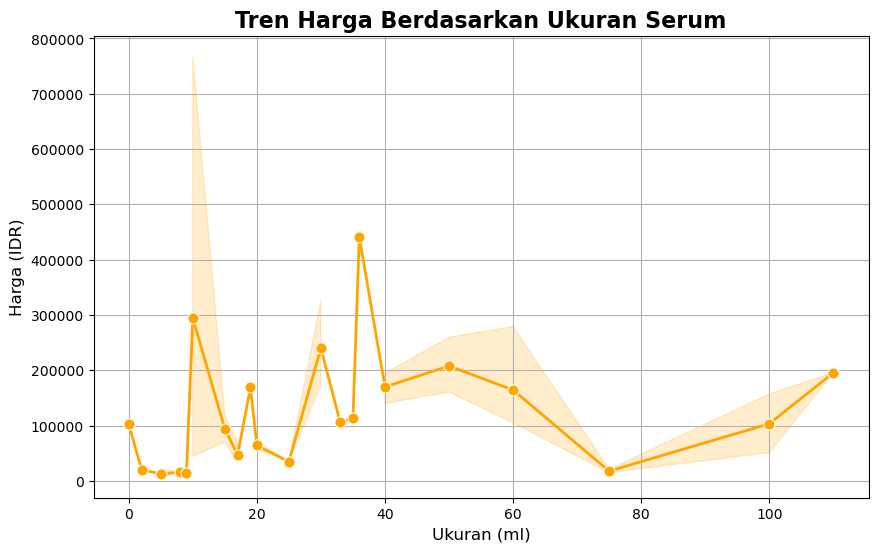

In [83]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

def normalize_size(size):
    # Memastikan bahwa ukuran tidak None atau NaN
    if pd.isna(size) or size is None:
        return None

    size = str(size).strip()  # Mengubah ke string dan menghapus spasi

    # Menangani rentang ukuran
    if '-' in size:
        parts = size.split('-')
        avg_size = (float(parts[0].replace('ml', '').replace('L', '').strip()) + 
                     float(parts[1].replace('ml', '').replace('L', '').strip())) / 2
        return avg_size if 'ml' in size else avg_size * 1000  # Konversi ke ml jika perlu

    # Memeriksa dan mengonversi ukuran ke ml
    match_ml = re.match(r'(\d+)\s*ml', size)
    if match_ml:
        return float(match_ml.group(1))

    match_liter = re.match(r'(\d+)\s*L', size)
    if match_liter:
        return float(match_liter.group(1)) * 1000  # Konversi liter ke ml

    return None  # Jika tidak dikenali

# Misalkan df adalah DataFrame yang sudah ada
df['Ukuran (ml)'] = df['ukuran'].apply(normalize_size)
df['Ukuran (ml)'] = df['Ukuran (ml)'].fillna(0)

# Membuat line plot untuk menunjukkan tren
plt.figure(figsize=(10, 6))
sns.lineplot(x='Ukuran (ml)', y='harga', data=df, marker='o', color='orange', linewidth=2, markersize=8)
plt.title('Tren Harga Berdasarkan Ukuran Serum', fontsize=16, fontweight='bold')
plt.xlabel('Ukuran (ml)', fontsize=12)
plt.ylabel('Harga (IDR)', fontsize=12)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [84]:
from scipy.stats import zscore
# Menghitung nilai rata-rata dan standar deviasi
mean_harga = df["harga"].mean()
std_harga = df["harga"].std()
# Menentukan batas atas dan batas bawah untuk outlier
upper_limit = mean_harga + 2 * std_harga
lower_limit = mean_harga - 2 * std_harga
# Menentukan outlier
outlier = df[(df["harga"] > upper_limit) | (df["harga"] < lower_limit)]
outlier

,namaproduk,harga,produkterjual,daerah,diskon(%),namatoko,ukuran,merek,provinsi,Ukuran (ml)
195,ojesh serum wajah hyluronic acid perawatan waj...,1950000,100,Jakarta Barat,0,efenel_baby,None,unknown,DKI Jakarta,0.0
243,doctor babor 10d hyaluronic acid ampoule serum...,1230000,100,Jakarta Utara,0,BABOR INDONESIA,None,unknown,DKI Jakarta,0.0
451,skiisk2skii lxp ulitmate perfecting serum seru...,2850000,100,Jakarta Utara,0,SK-II LOVERS SHOP,10 ml,skii,DKI Jakarta,10.0
483,vichy liftactiv pure vitamin brightening corre...,699000,90,Jakarta Utara,0,Winnie's Stores,None,unknown,DKI Jakarta,0.0
566,la roche posay mela b3 niacinamide serum 30ml ...,756600,1000,Tangerang,3,La Roche Posay,30 ml,la roche posay,Banten,30.0
893,neostrata bionic face serum pencerahantiaging ...,630500,100,Jakarta Selatan,3,BPOM-Skincare,30 ml,unknown,DKI Jakarta,30.0
960,hyaluronic acid hyaron skin booster hyaluronic...,820000,100,Jakarta Selatan,0,Gangnamstore7,None,unknown,DKI Jakarta,0.0
1015,perawatan wajah skincare essence serum rossceu...,950000,2000,Jakarta Barat,0,efenel_baby,None,unknown,DKI Jakarta,0.0
1451,obagi professional serum 10 30 ml vitamin wajah,1388000,90,Jakarta Timur,0,Rich Rabbit,30 ml,unknown,DKI Jakarta,30.0
1556,neostrata bionic face serum 30ml serum,600000,90,Bogor,0,female things,30 ml,unknown,Jawa Barat,30.0
